# Proyecto 1 de curso

### IE0247 - Señales y Sistemas I

### 2º Ciclo - 2023

### César Luis Fallas Gutiérrez - Carné: C12770

### Grupo: 01





Se presenta el código de la primera y de la segunda parte de este proyecto, el cual se basa en el código realizado por Ana Daniela del Río Pulido y Erin C. McKiernan de la Facultad de Ciencias de la Universidad Nacional Autónoma de México.

El siguiente programa trata de un sistema ya que recibe señales de entrada, los archivos de audio; y retorna datos de salida, en este caso, el valor de la frecuencia cardíaca de cada audio.

# Parte 1
### 10 de septiembre de 2023


Preámbulo que importa los módulos necesarios para crear las figuras de los gráficos y facilitar las operaciones matemáticas.

In [ ]:
# Imports python libraries
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt #for filtering data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

Función que permite recolectar los datos de las señales de los archivos de audio. El objetivo es poder graficar para obtener una representación visual de dichos archivos.

In [ ]:
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file
def ecg(variable):
    record = wave.open(variable, 'r') # load the data

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()

    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData

Se crea una lista con los nombres de los archivos para obtener su información.

In [ ]:
#Test data
nice = ["a0015", "a0032", "a0094", "a0106", "b0002", "b0019", "b0054", "b0056", "b0096", "b0171", "b0232", "c0003", "c0031", "d0002", "d0009"]

Función que mediante un ciclo for grafica cada señal.

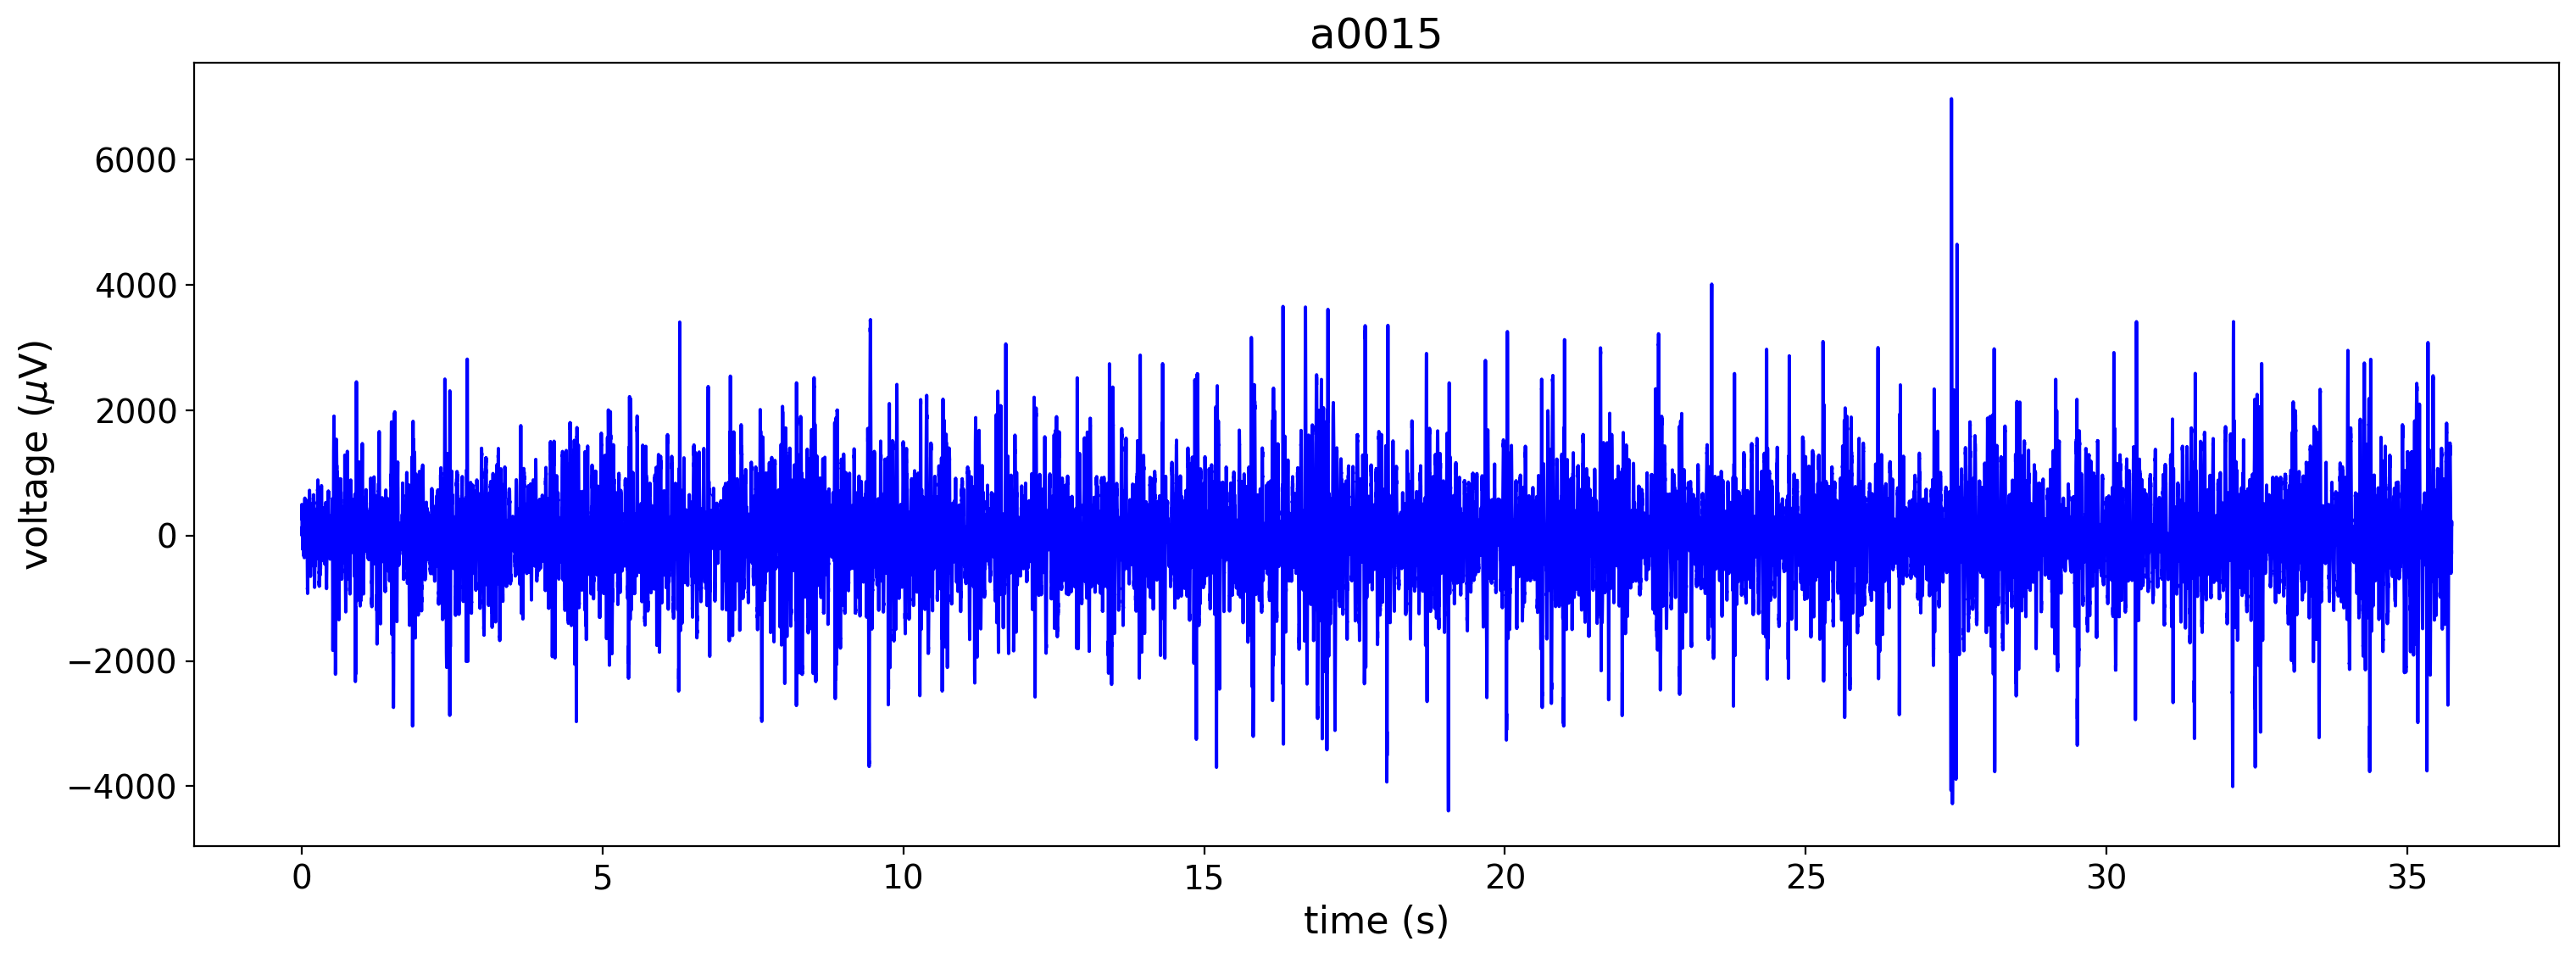

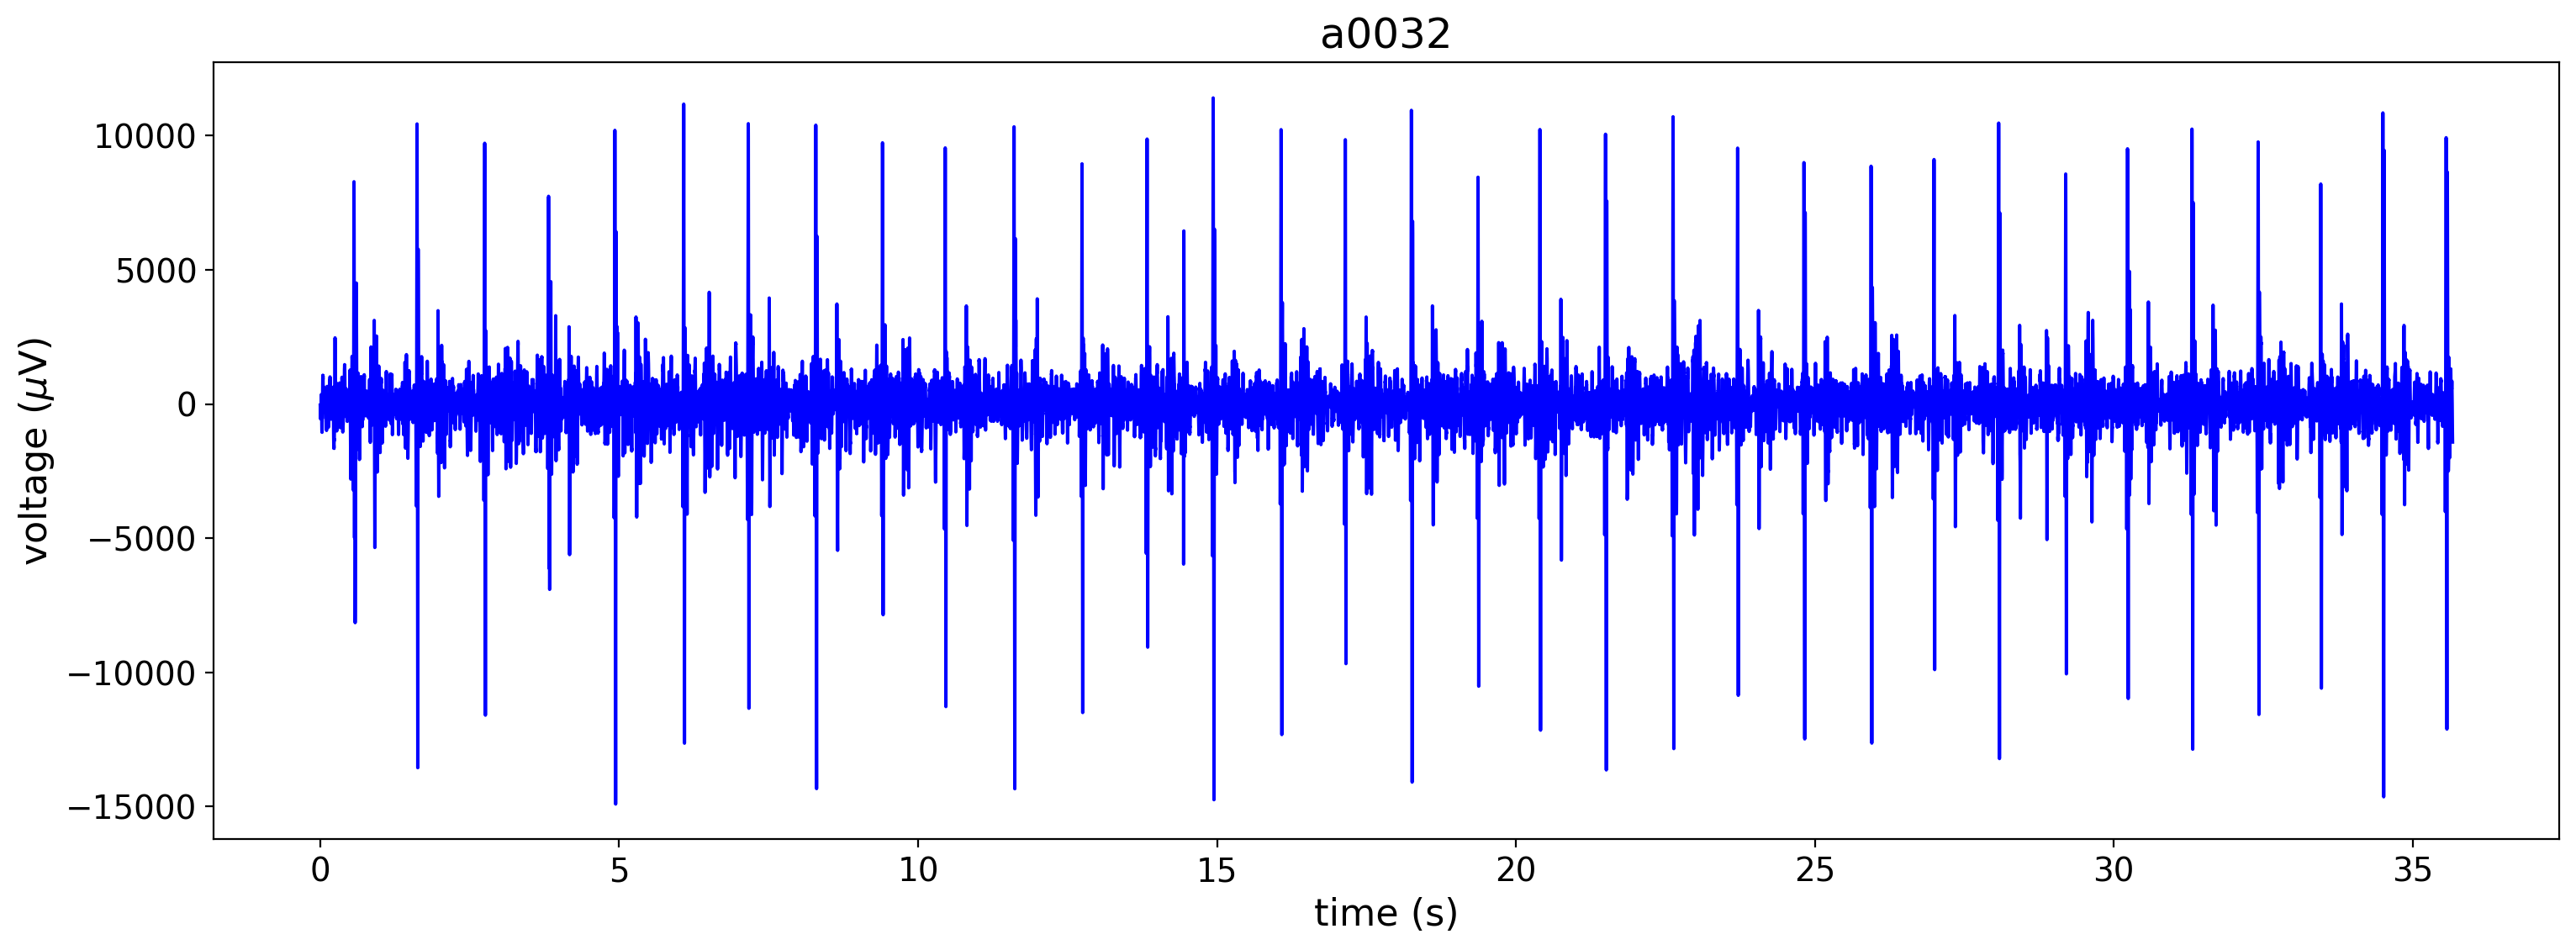

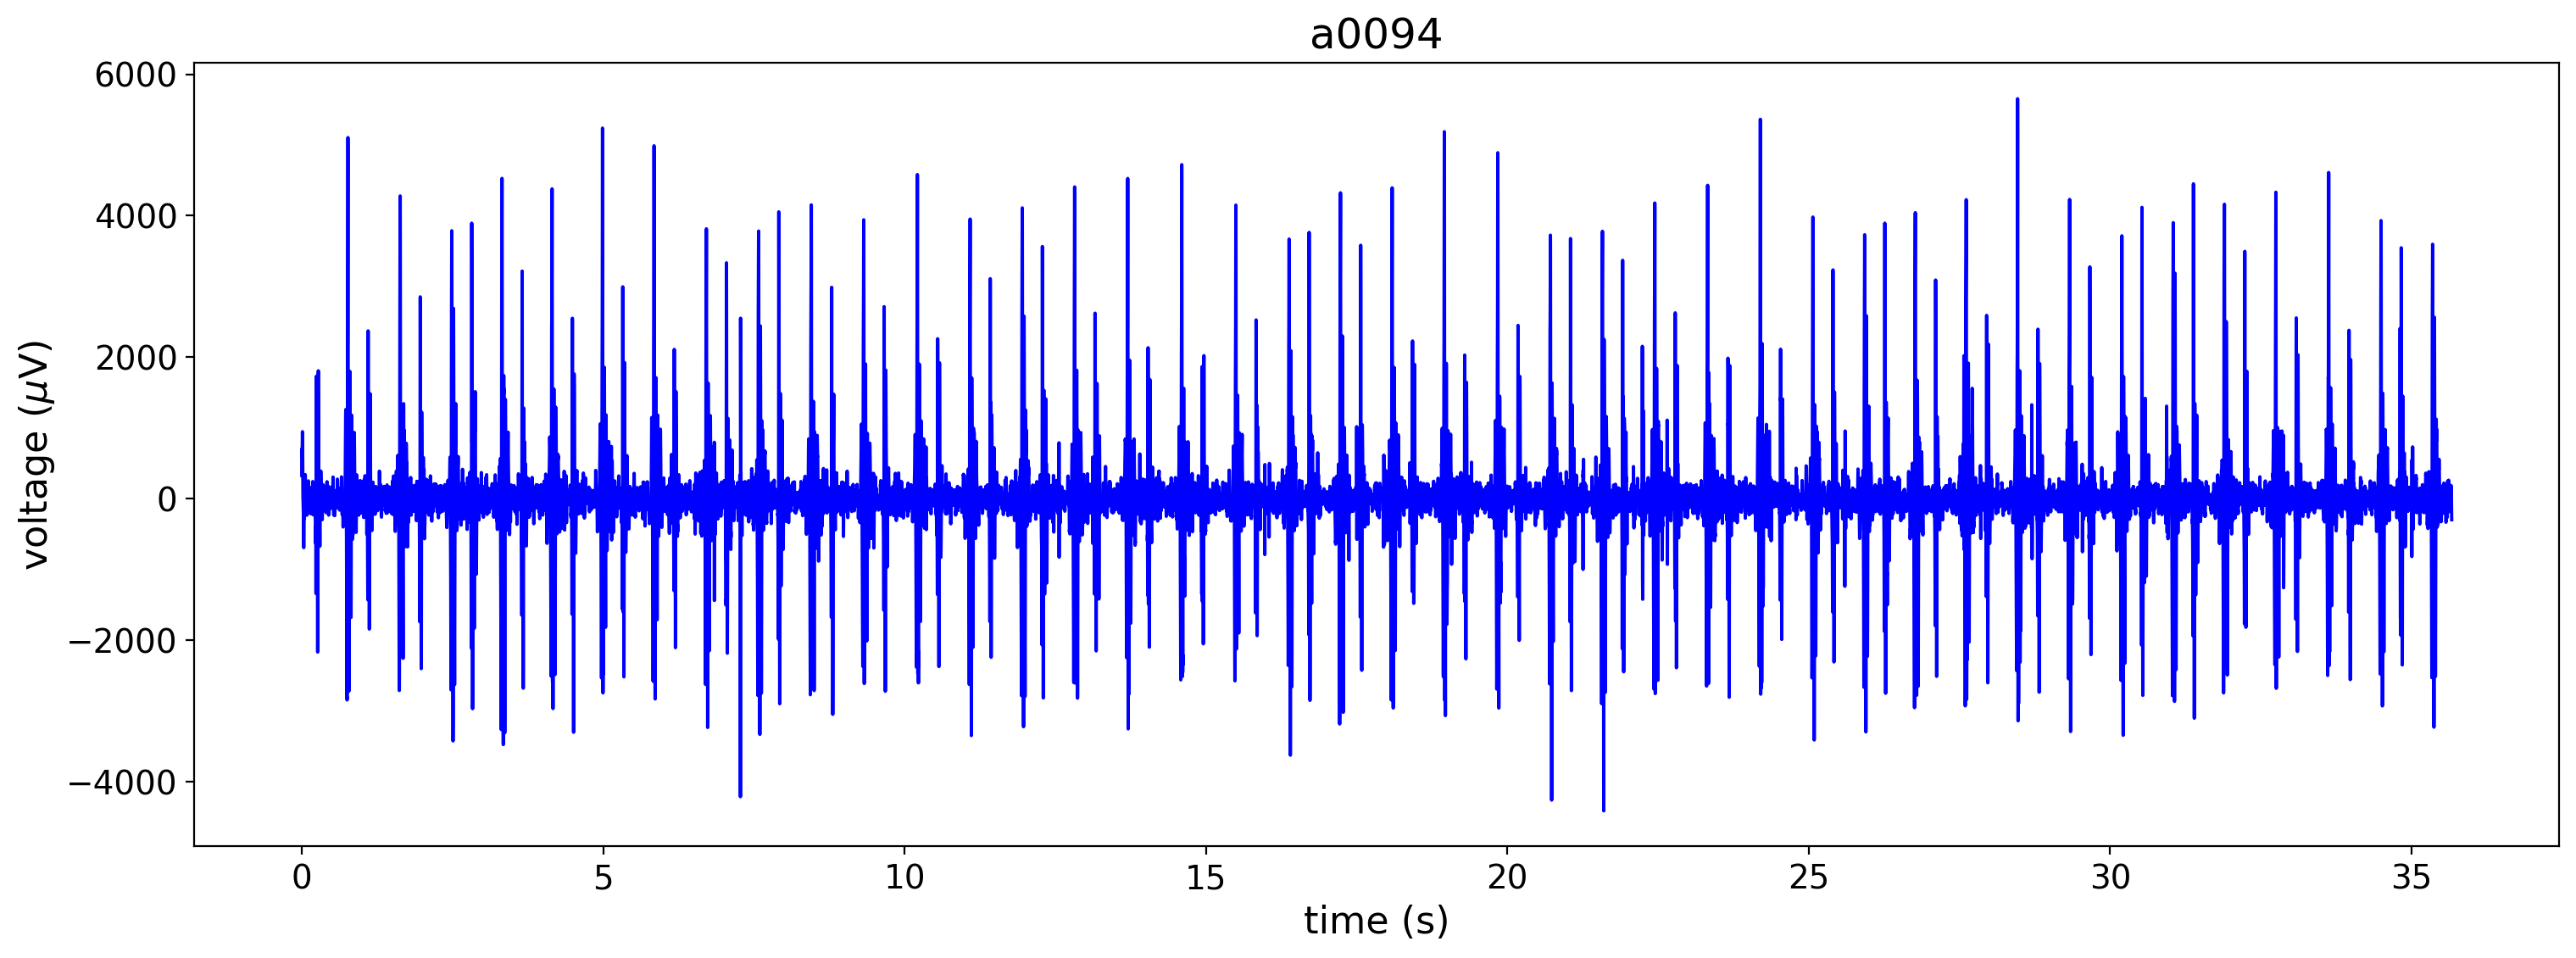

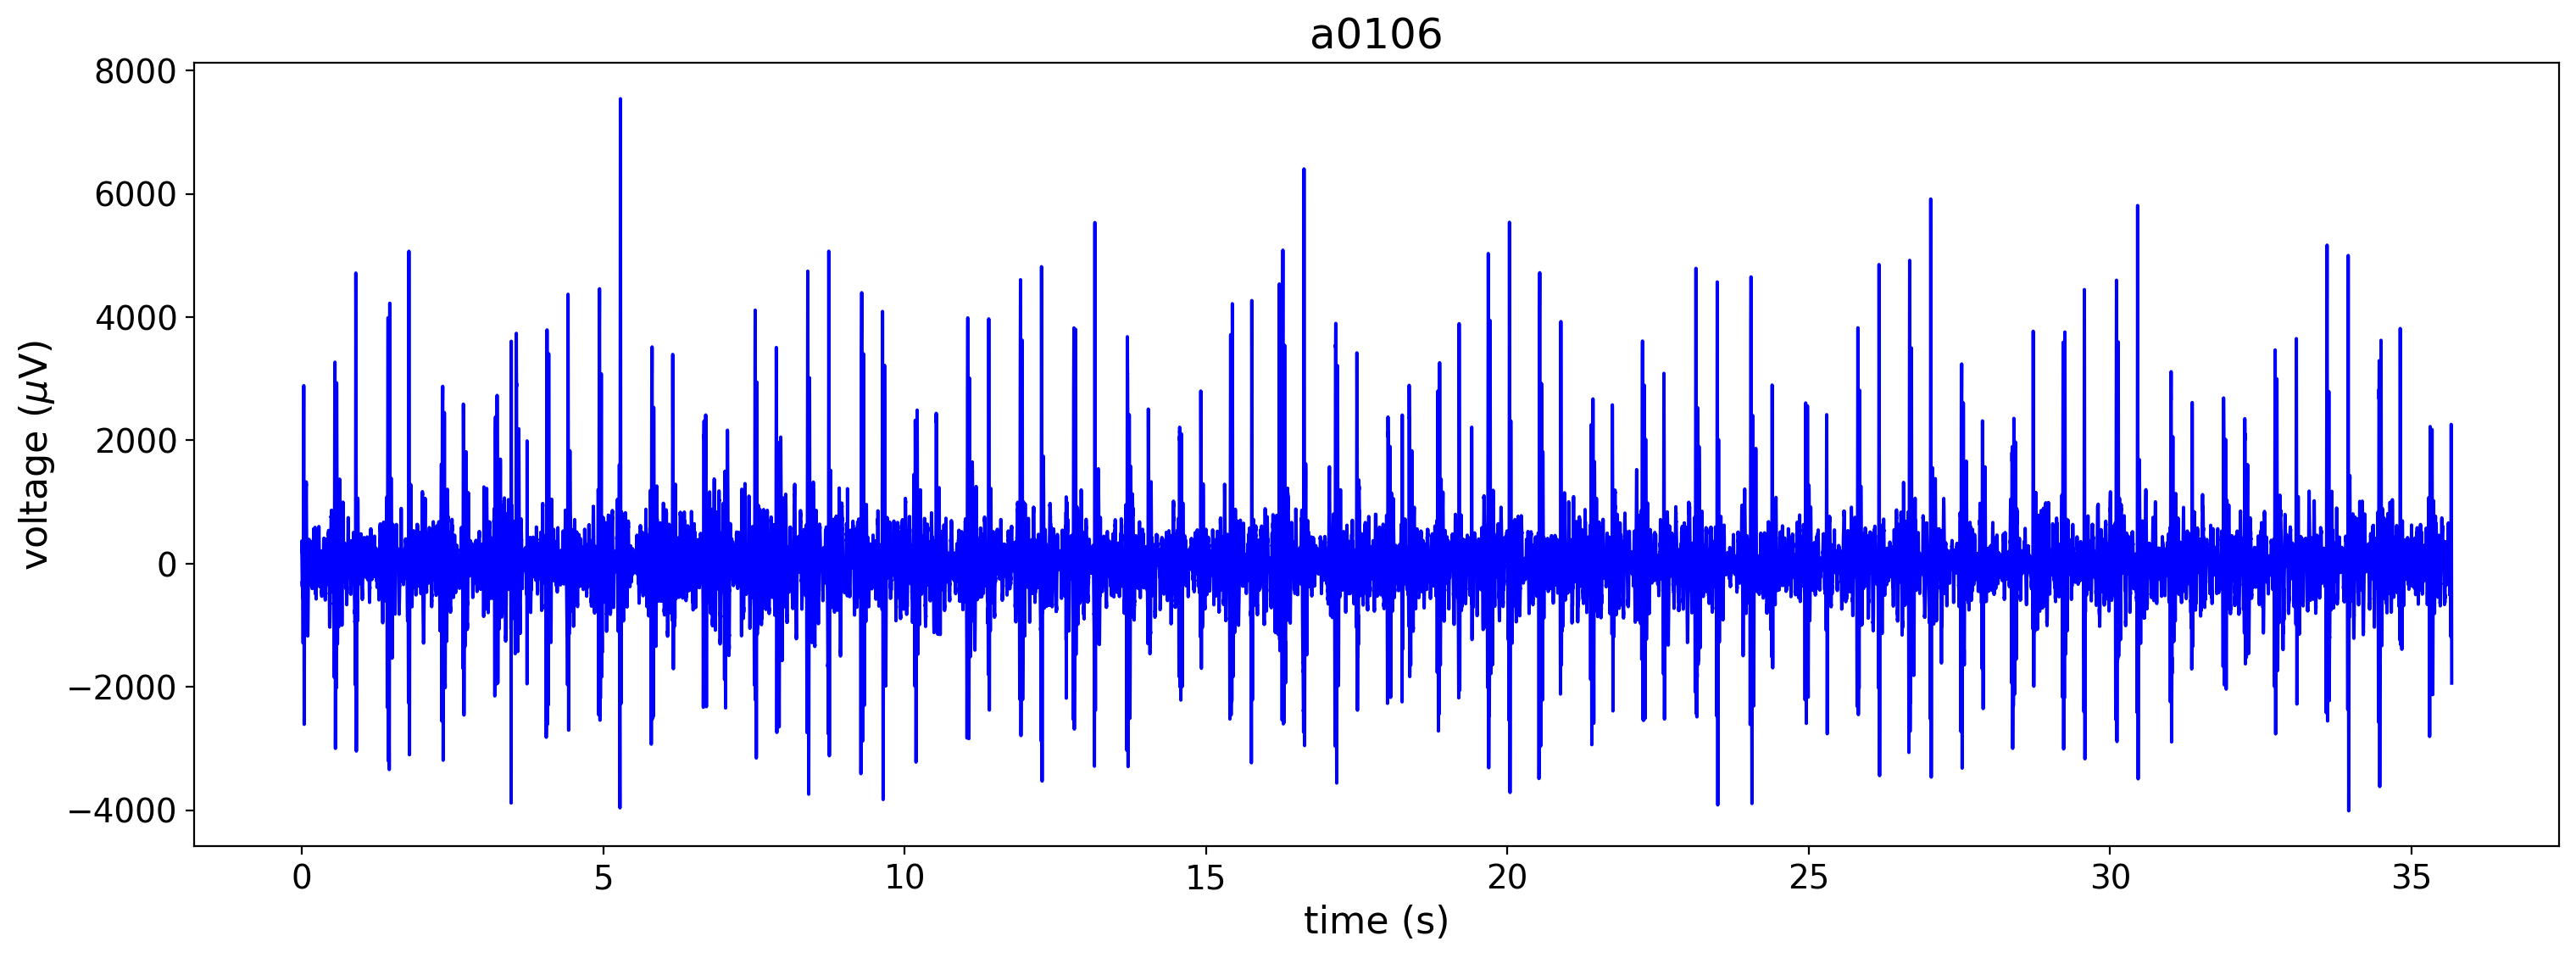

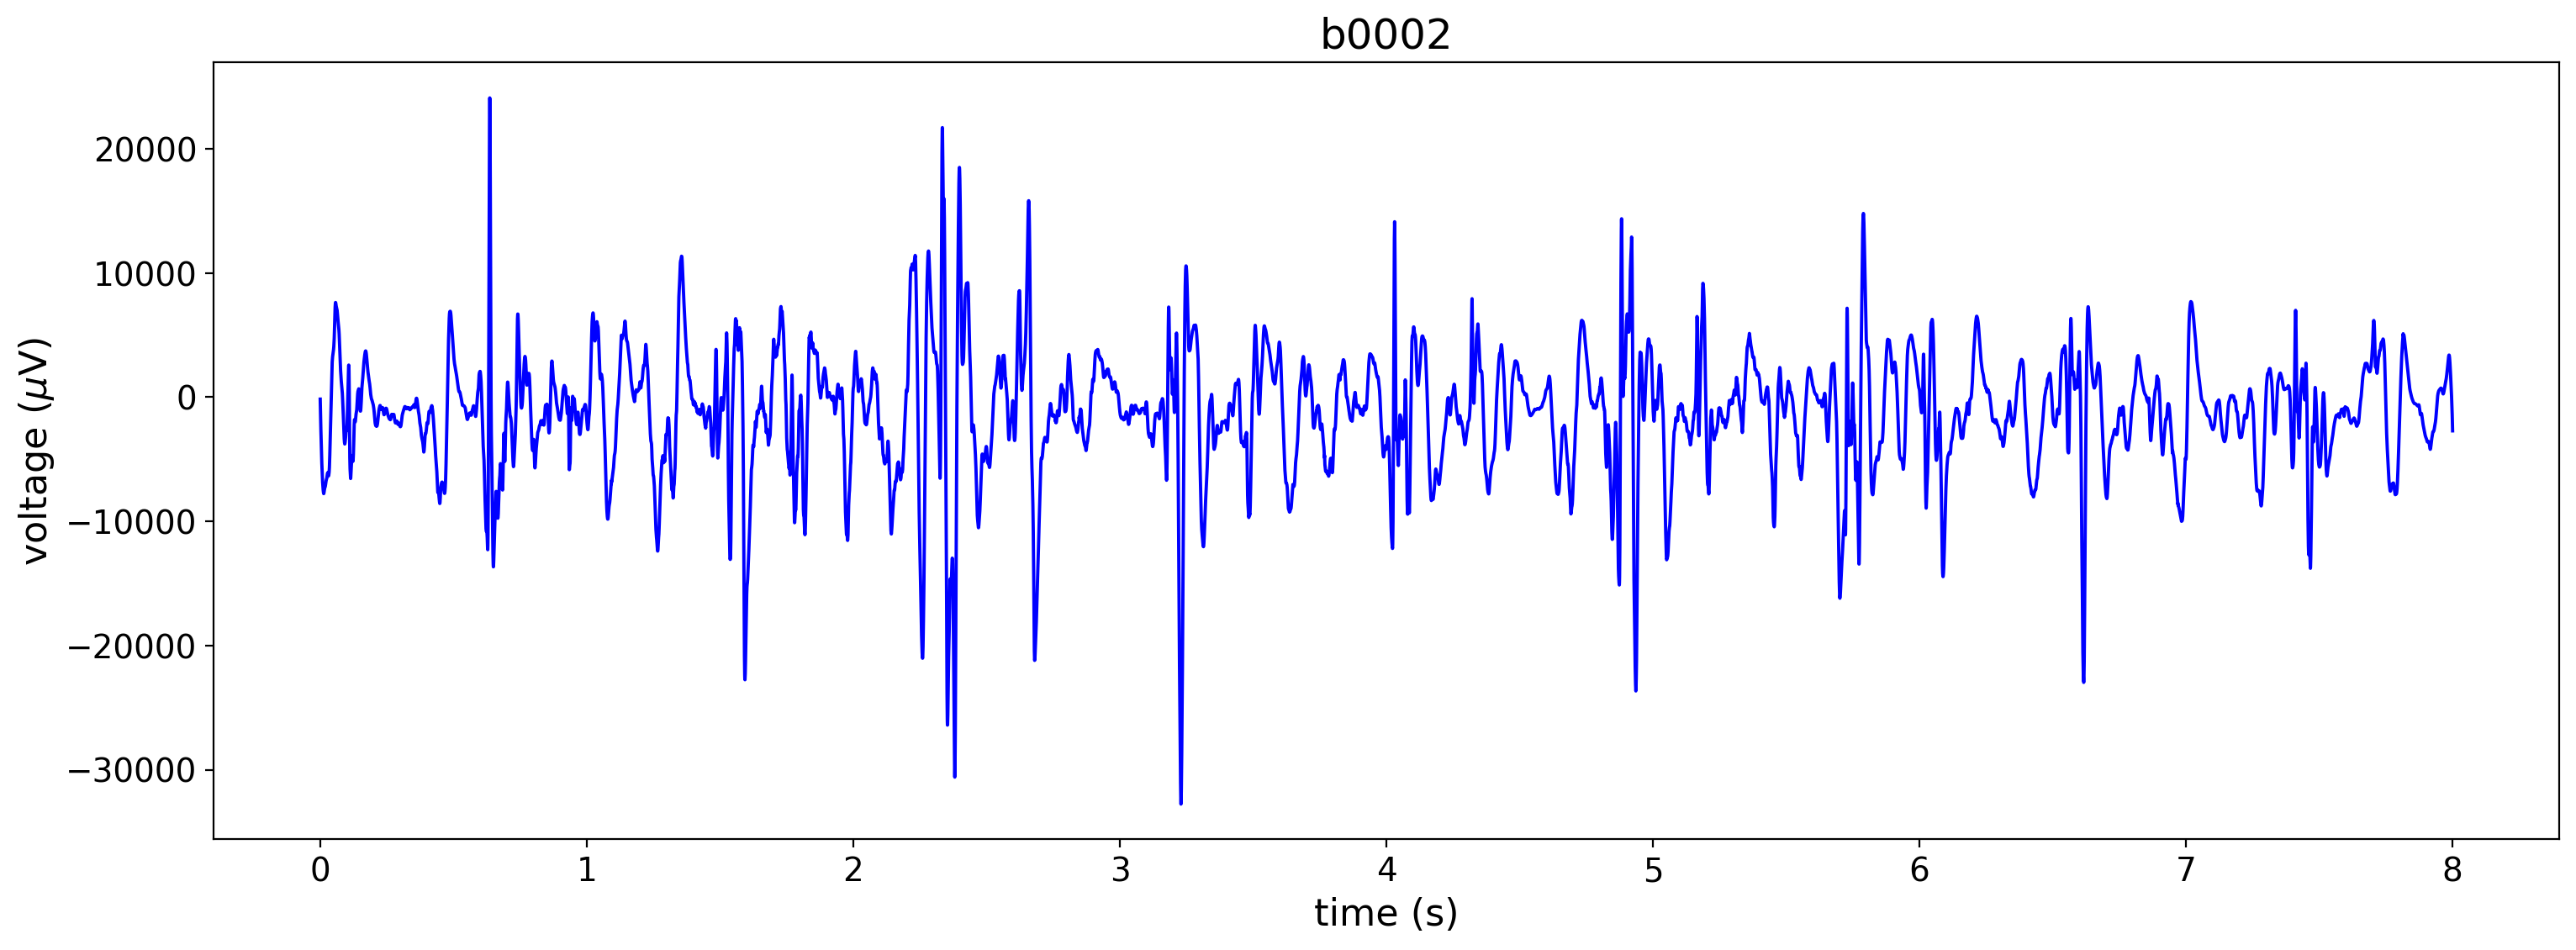

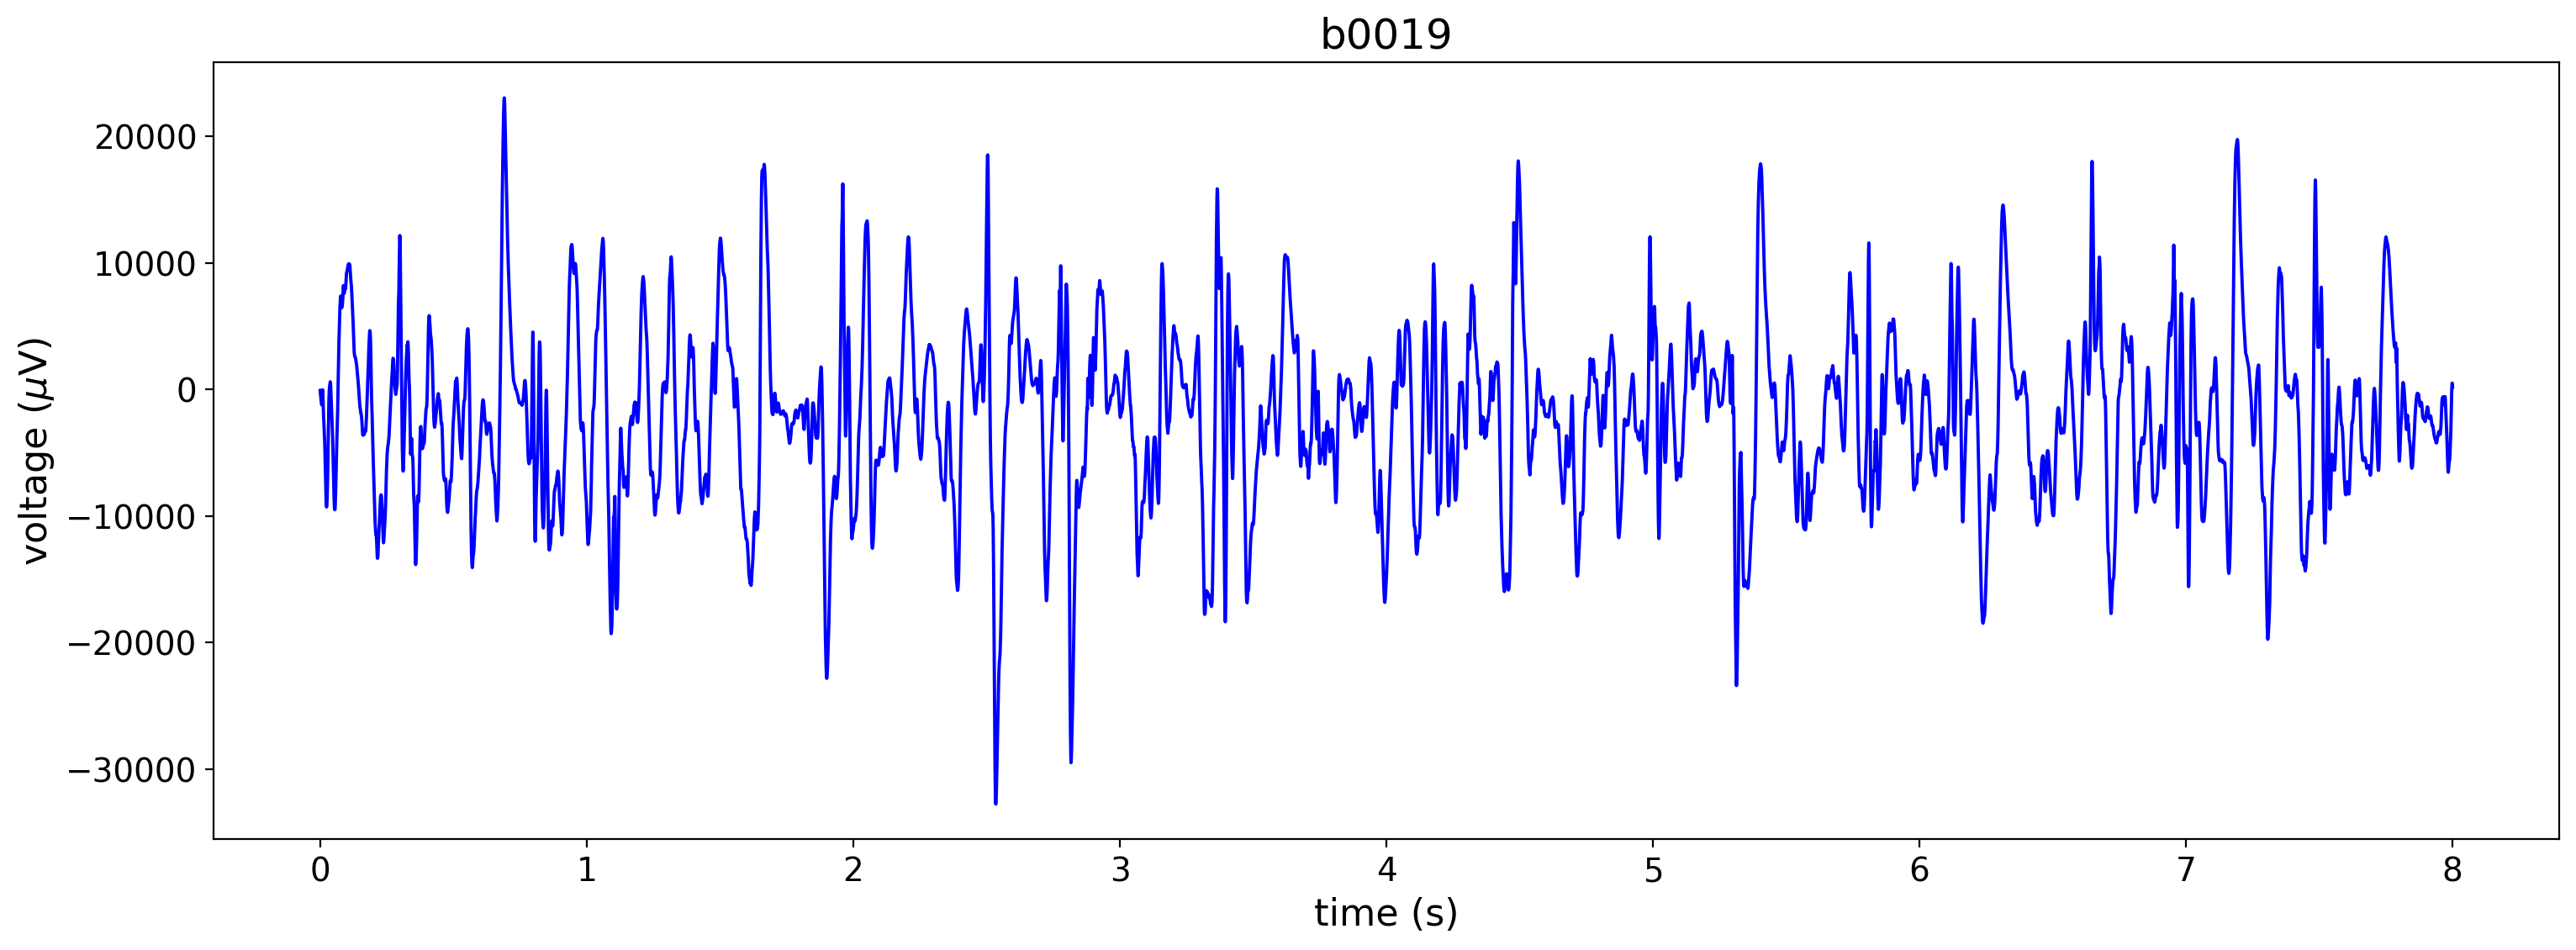

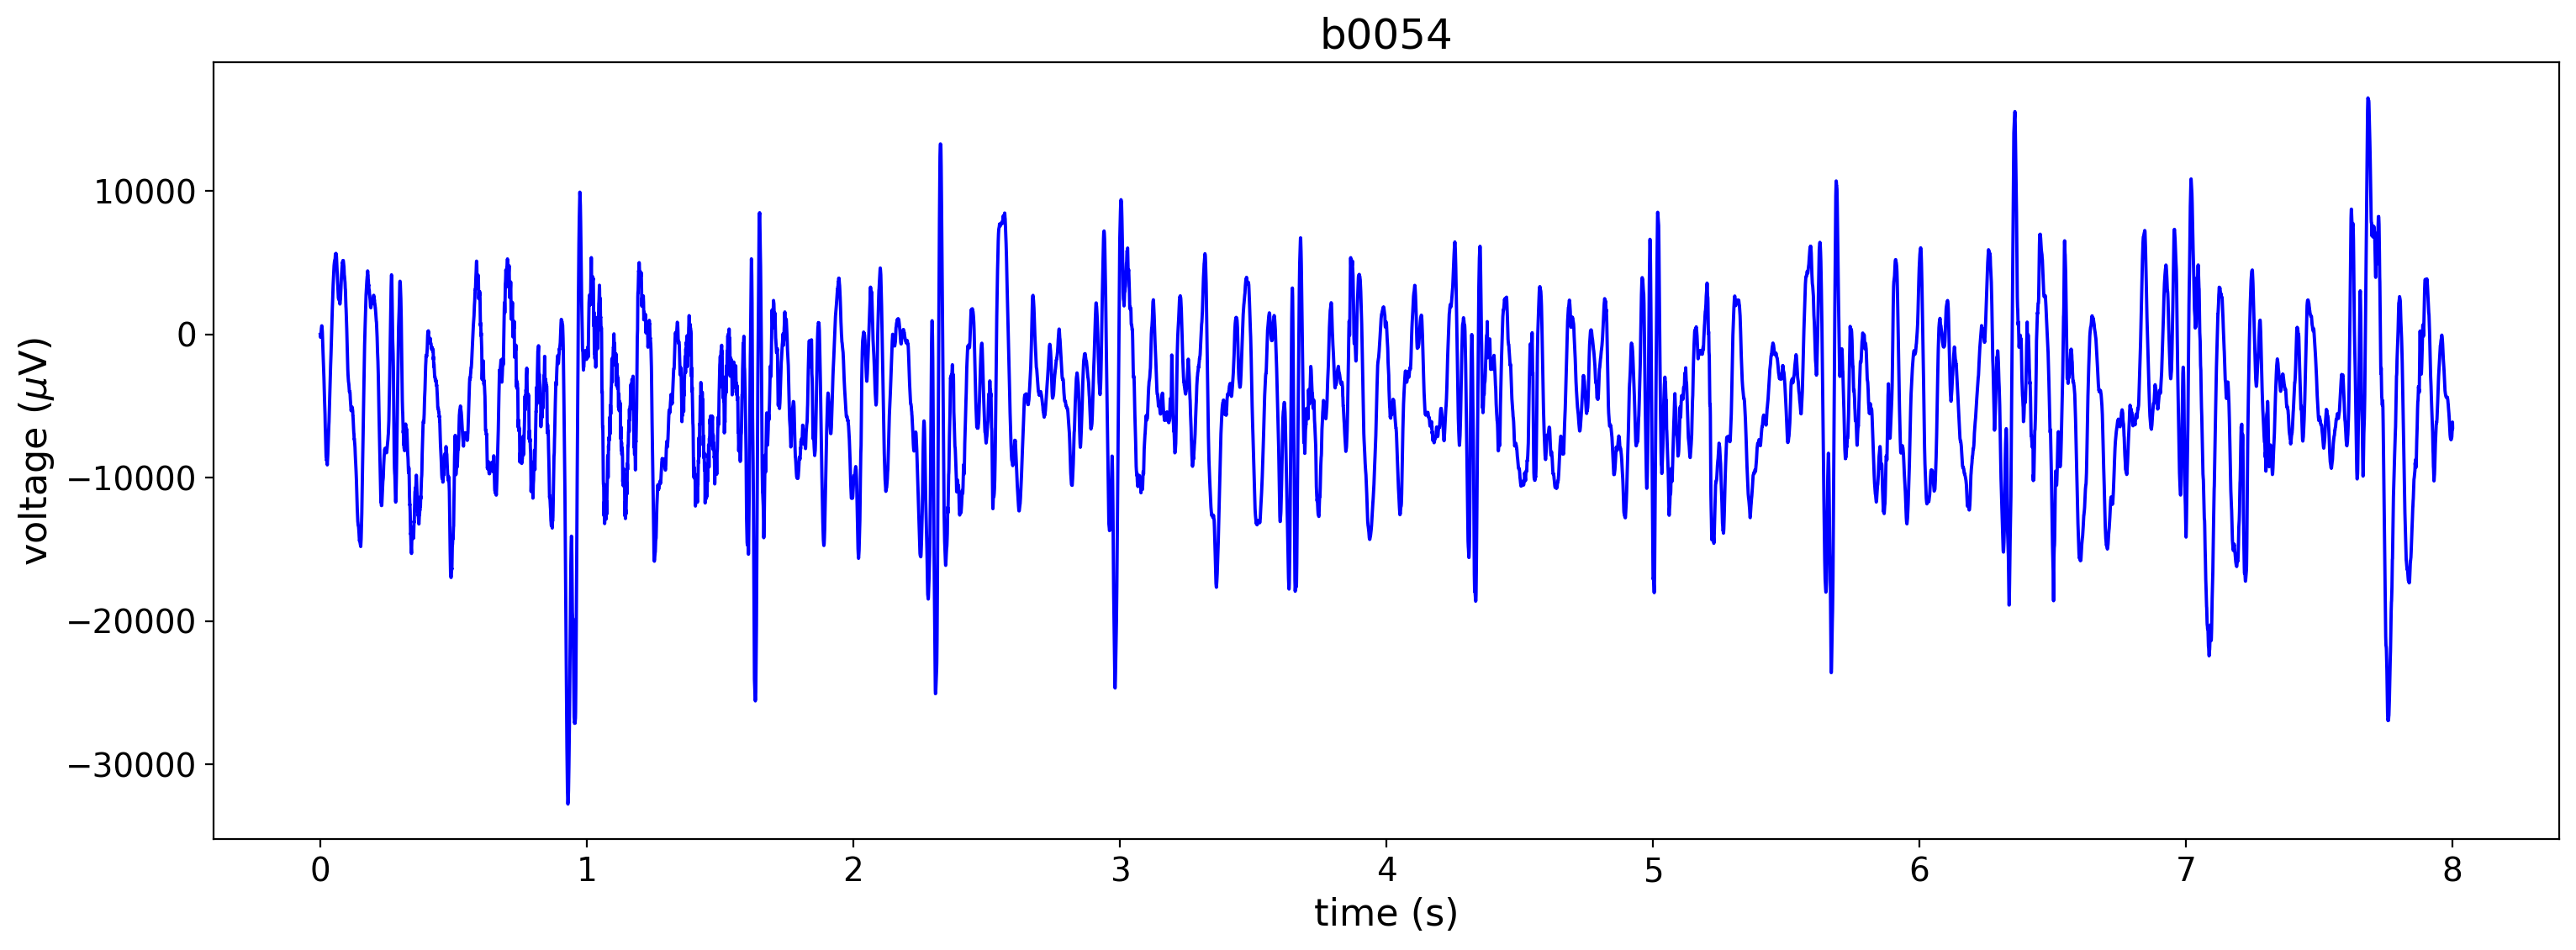

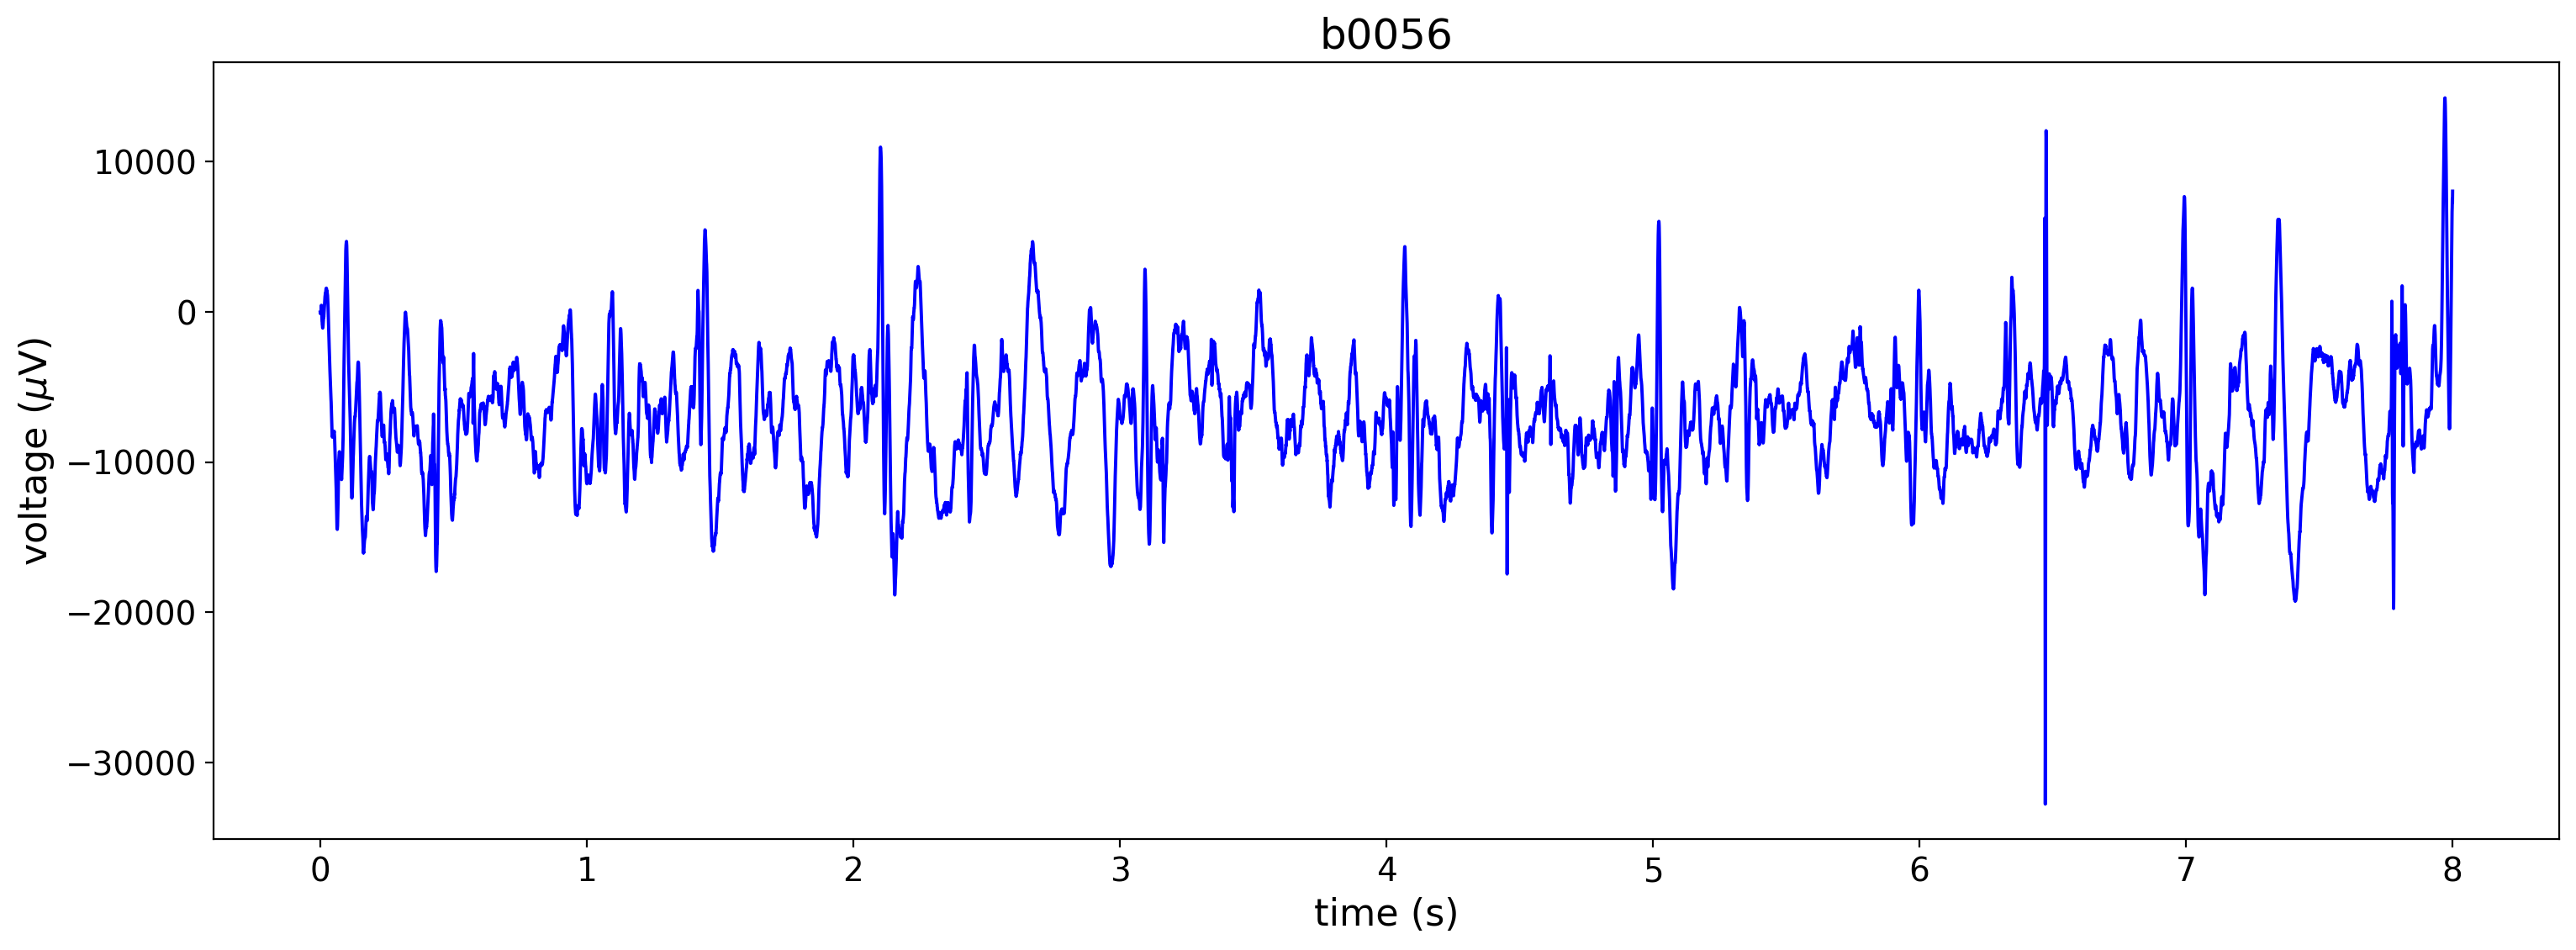

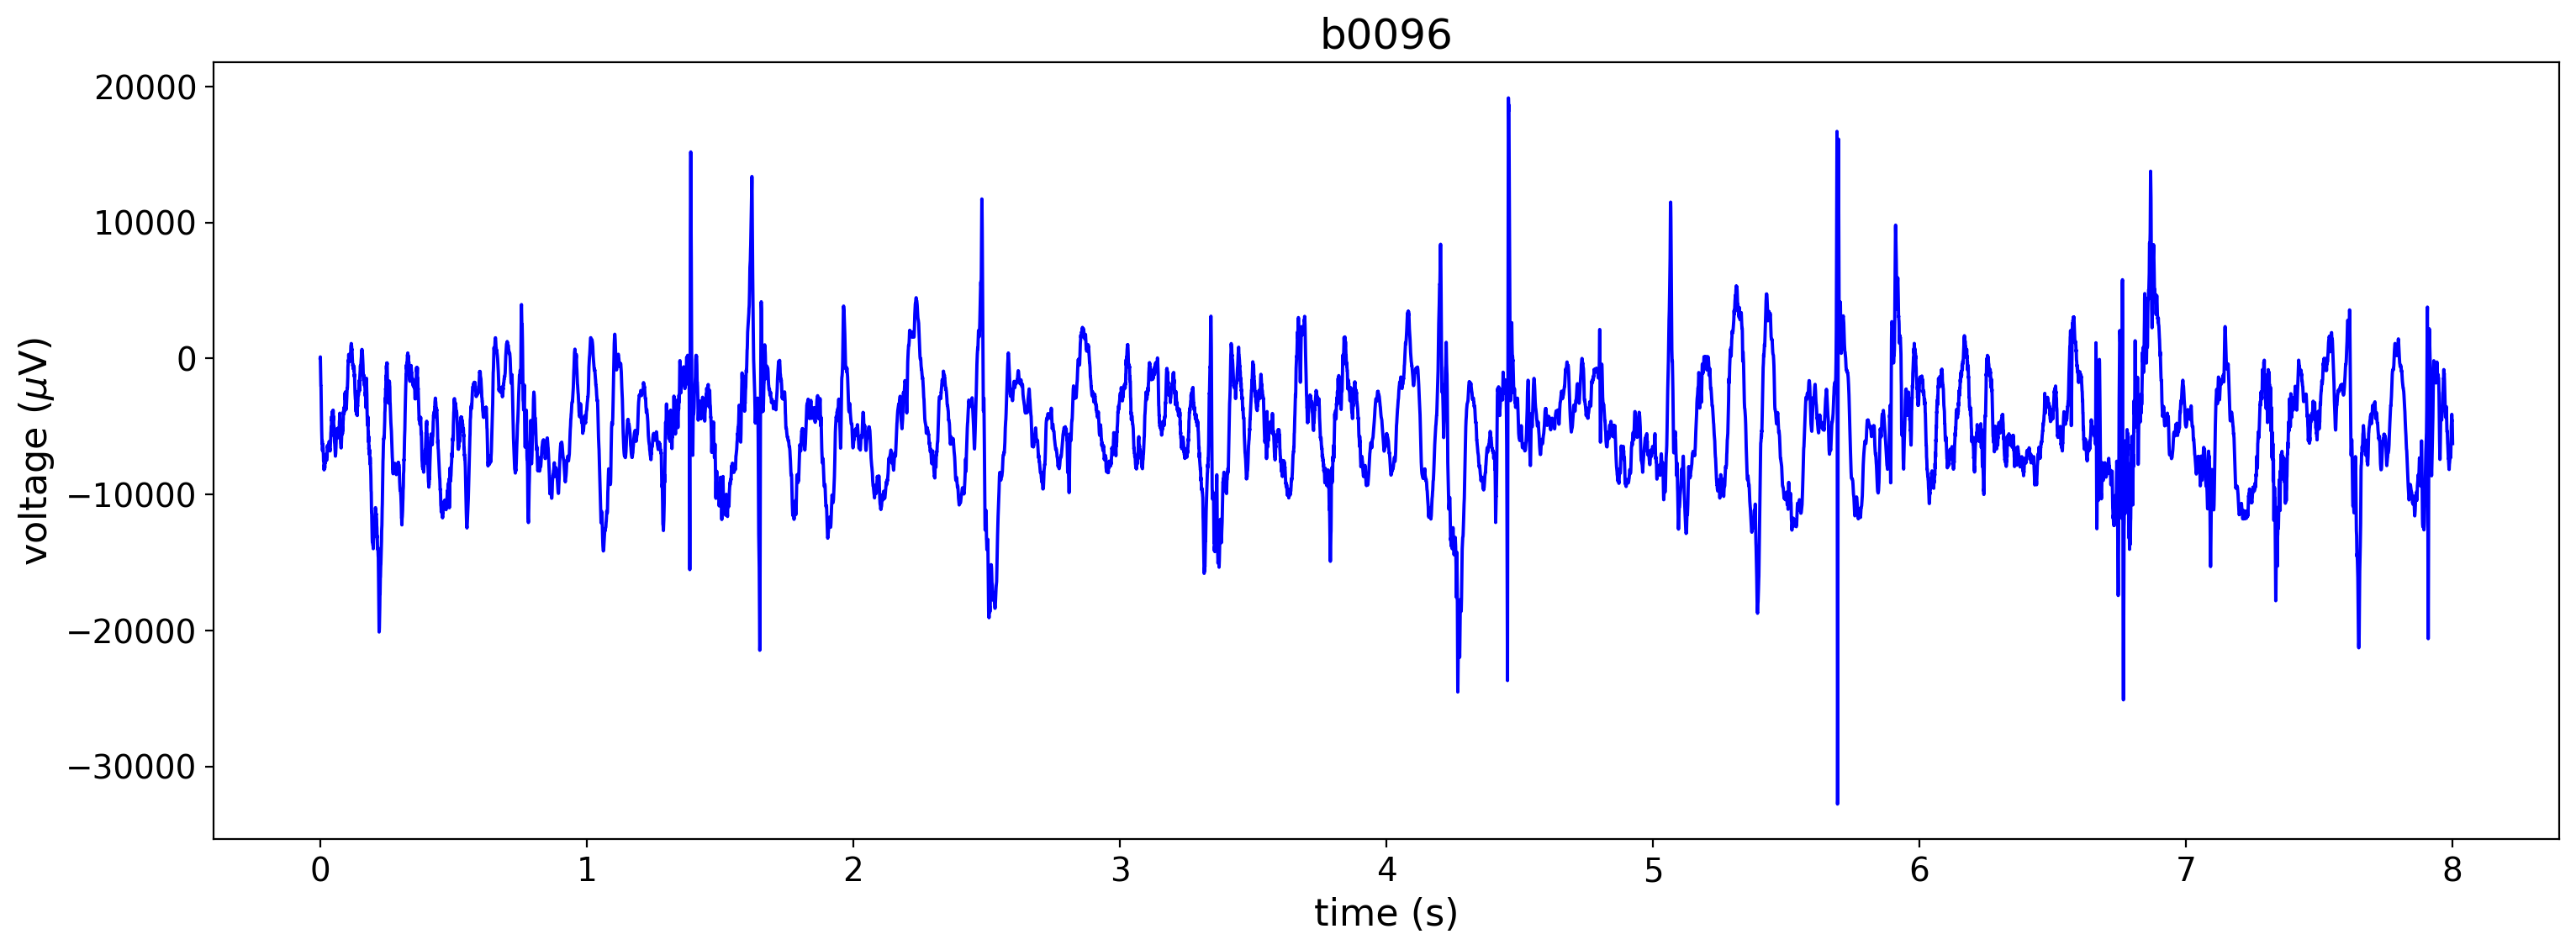

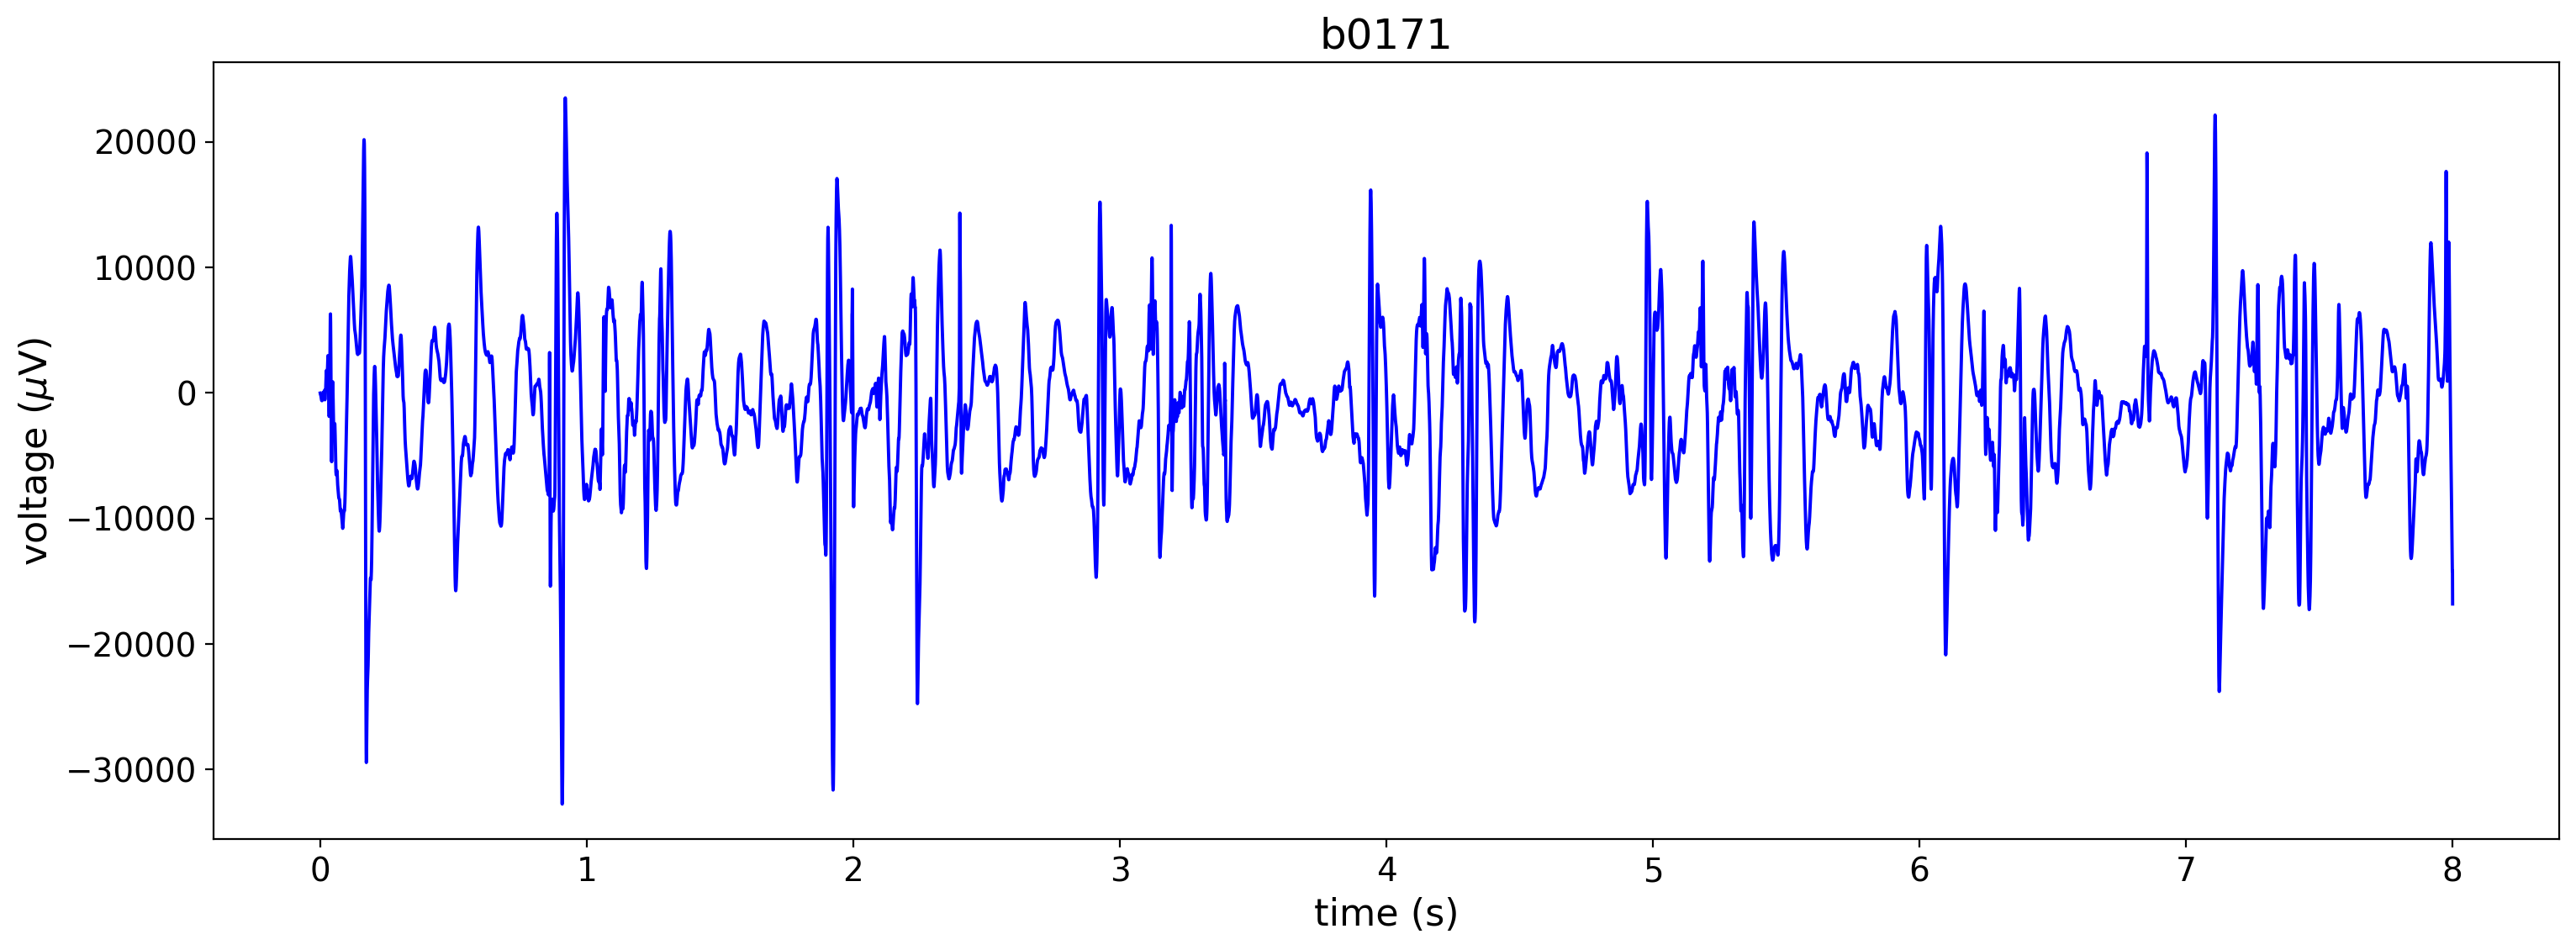

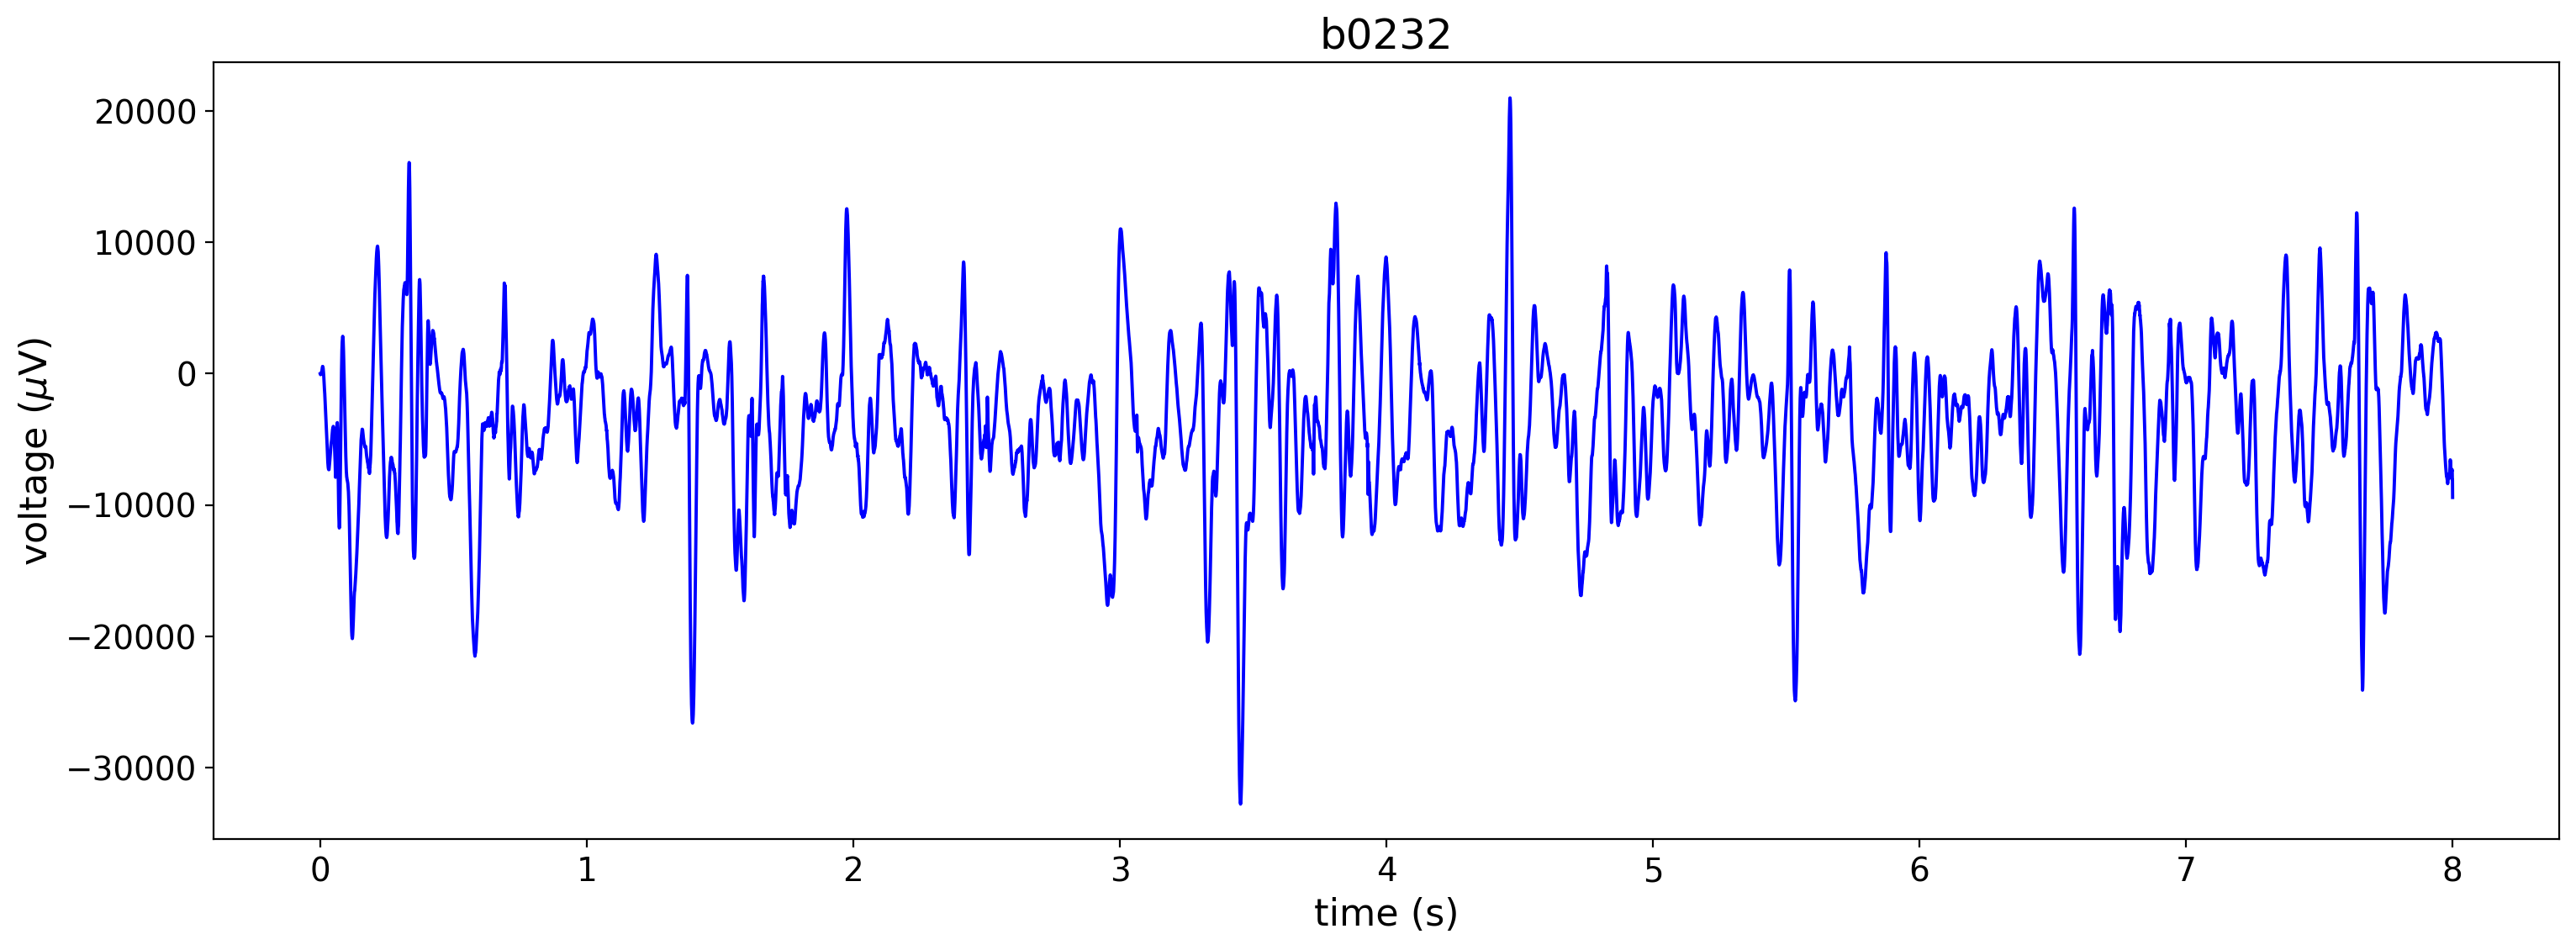

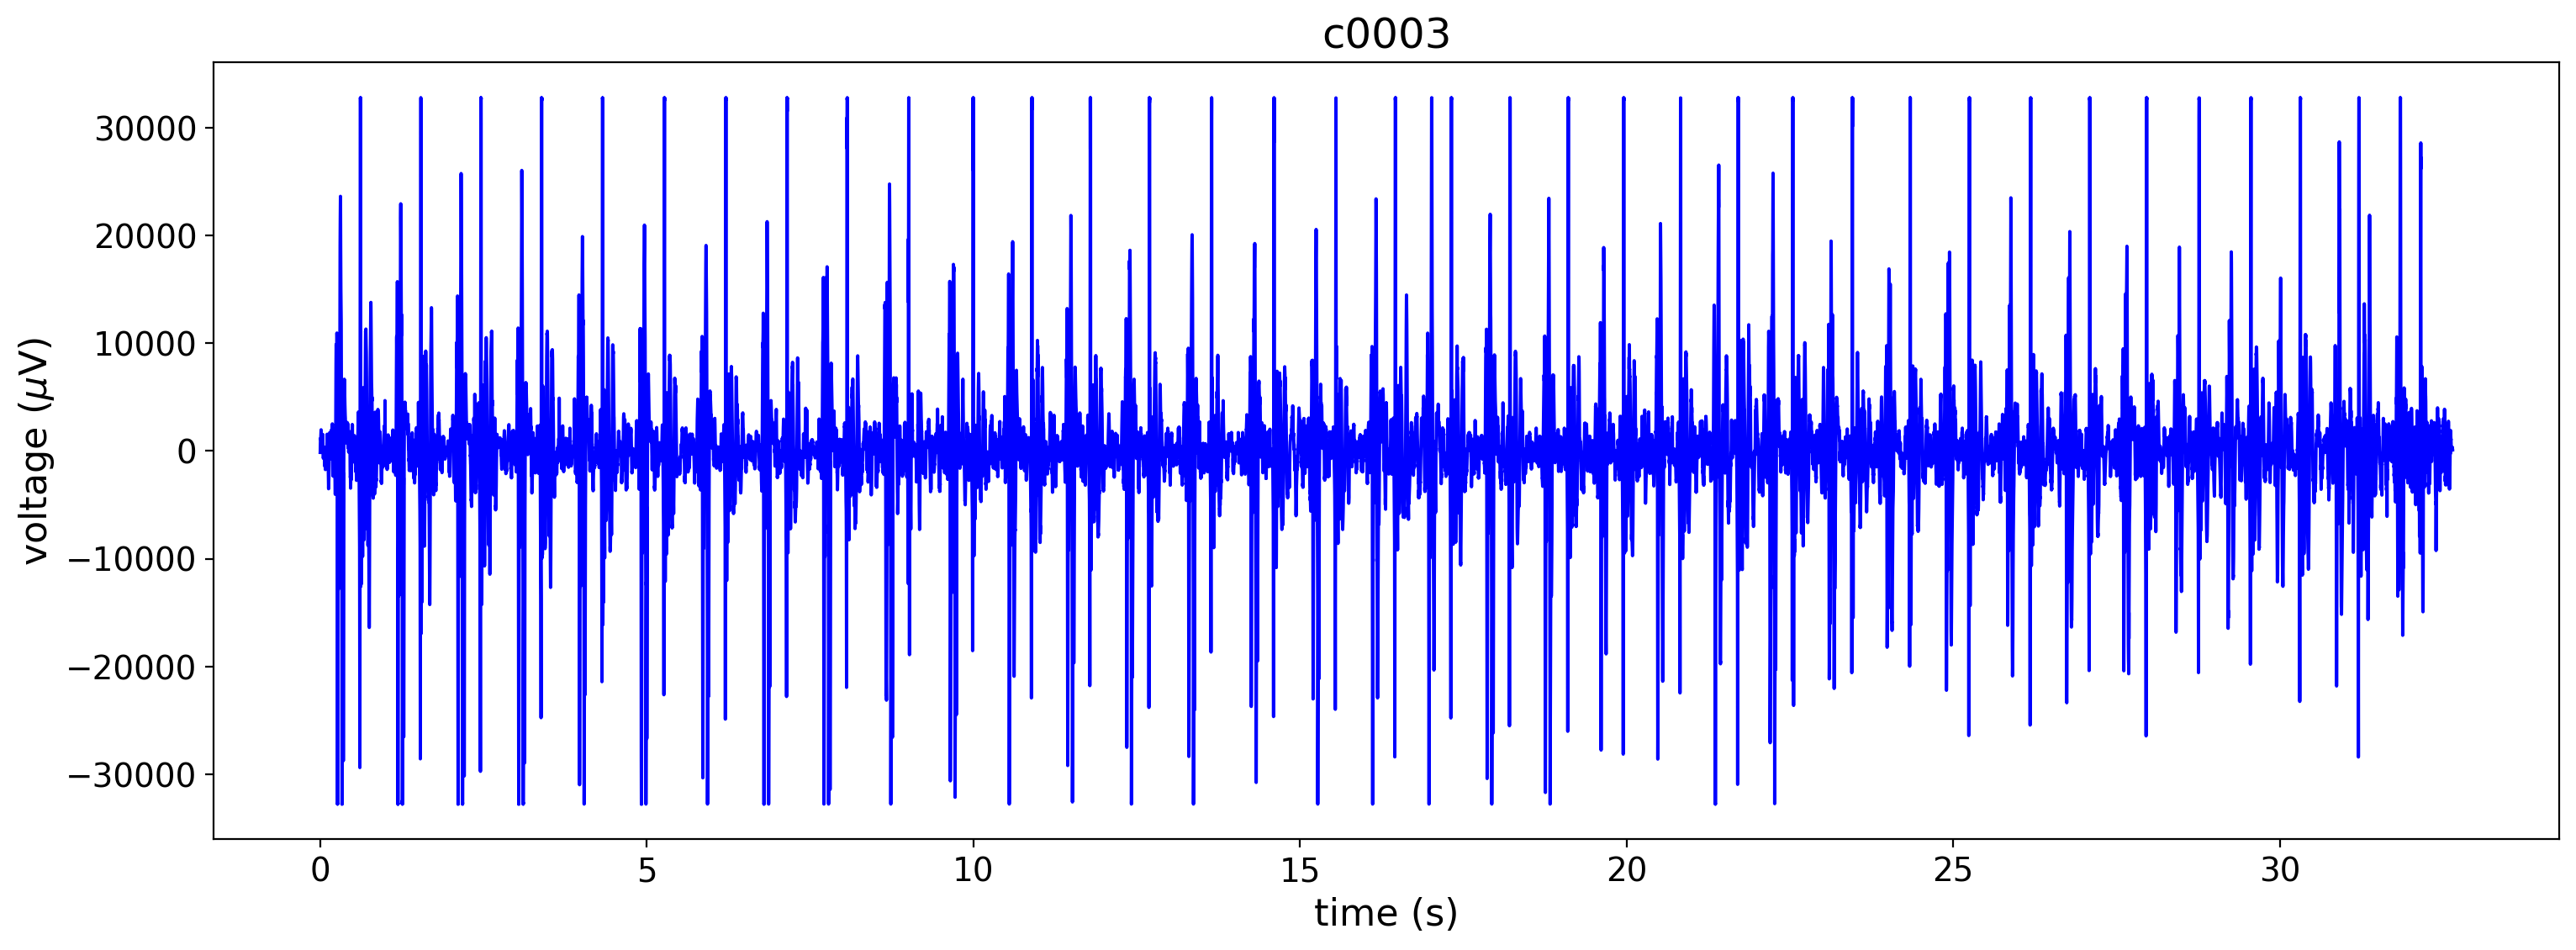

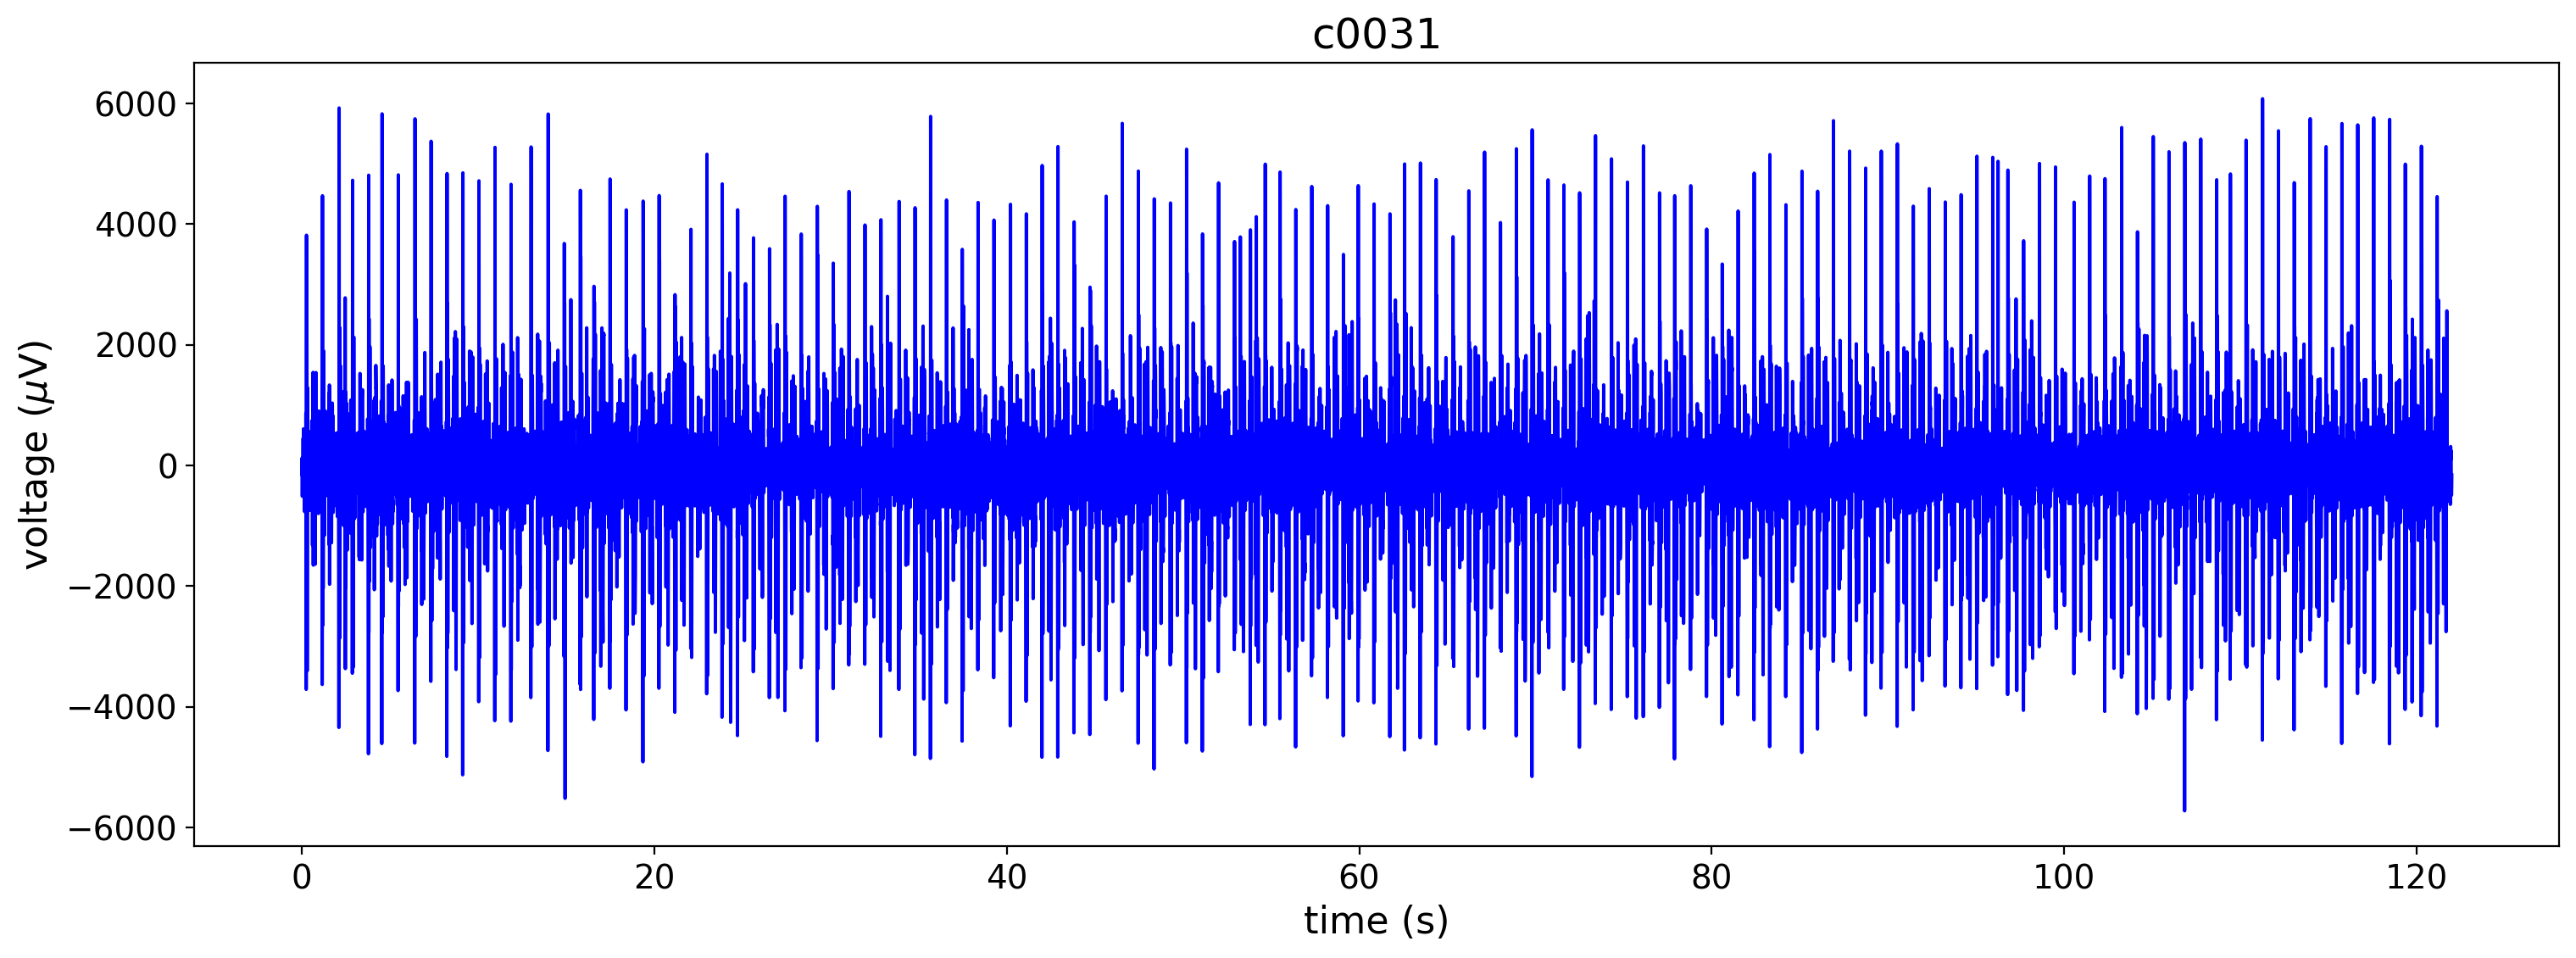

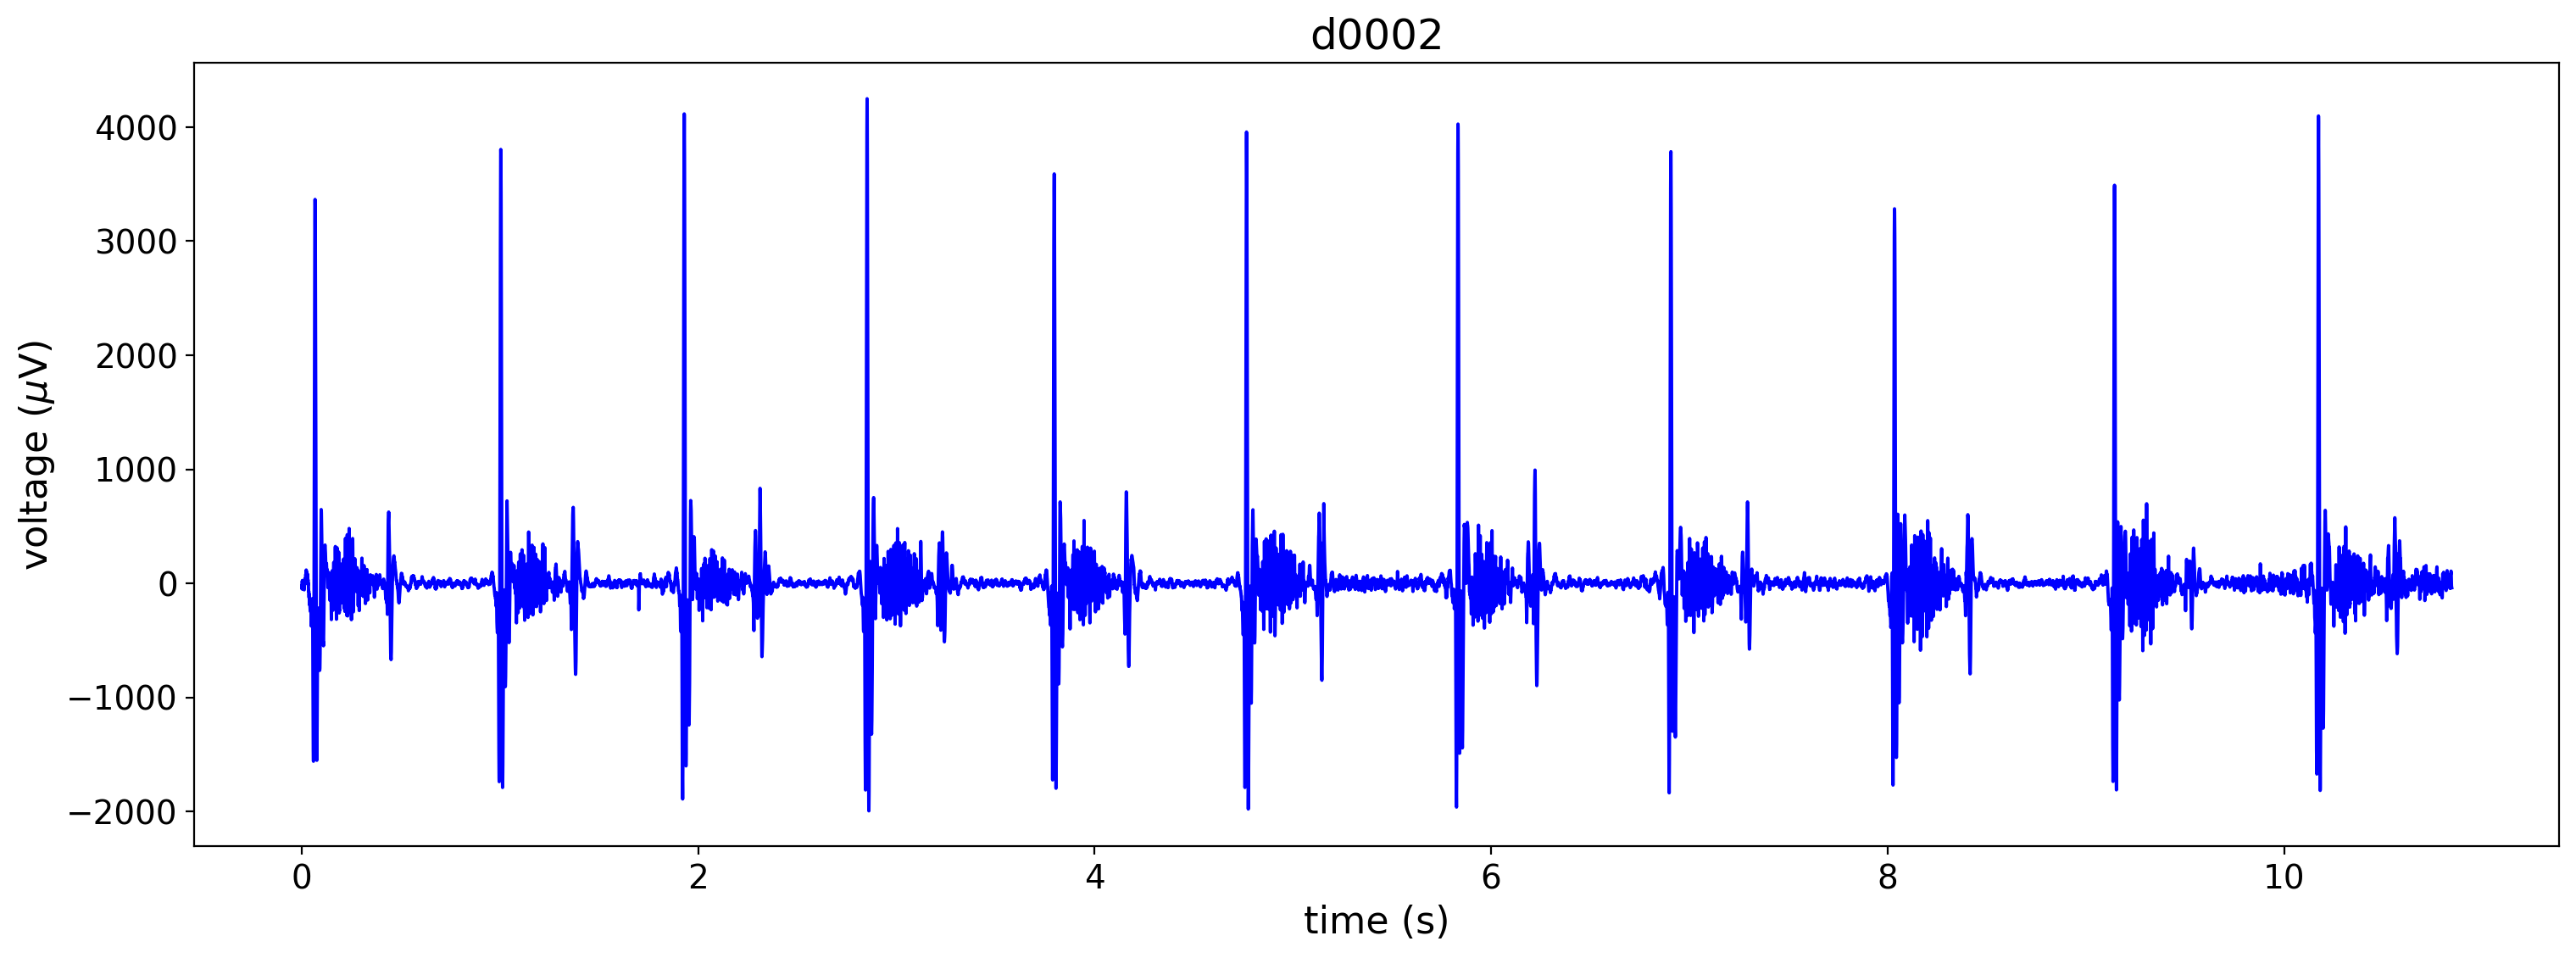

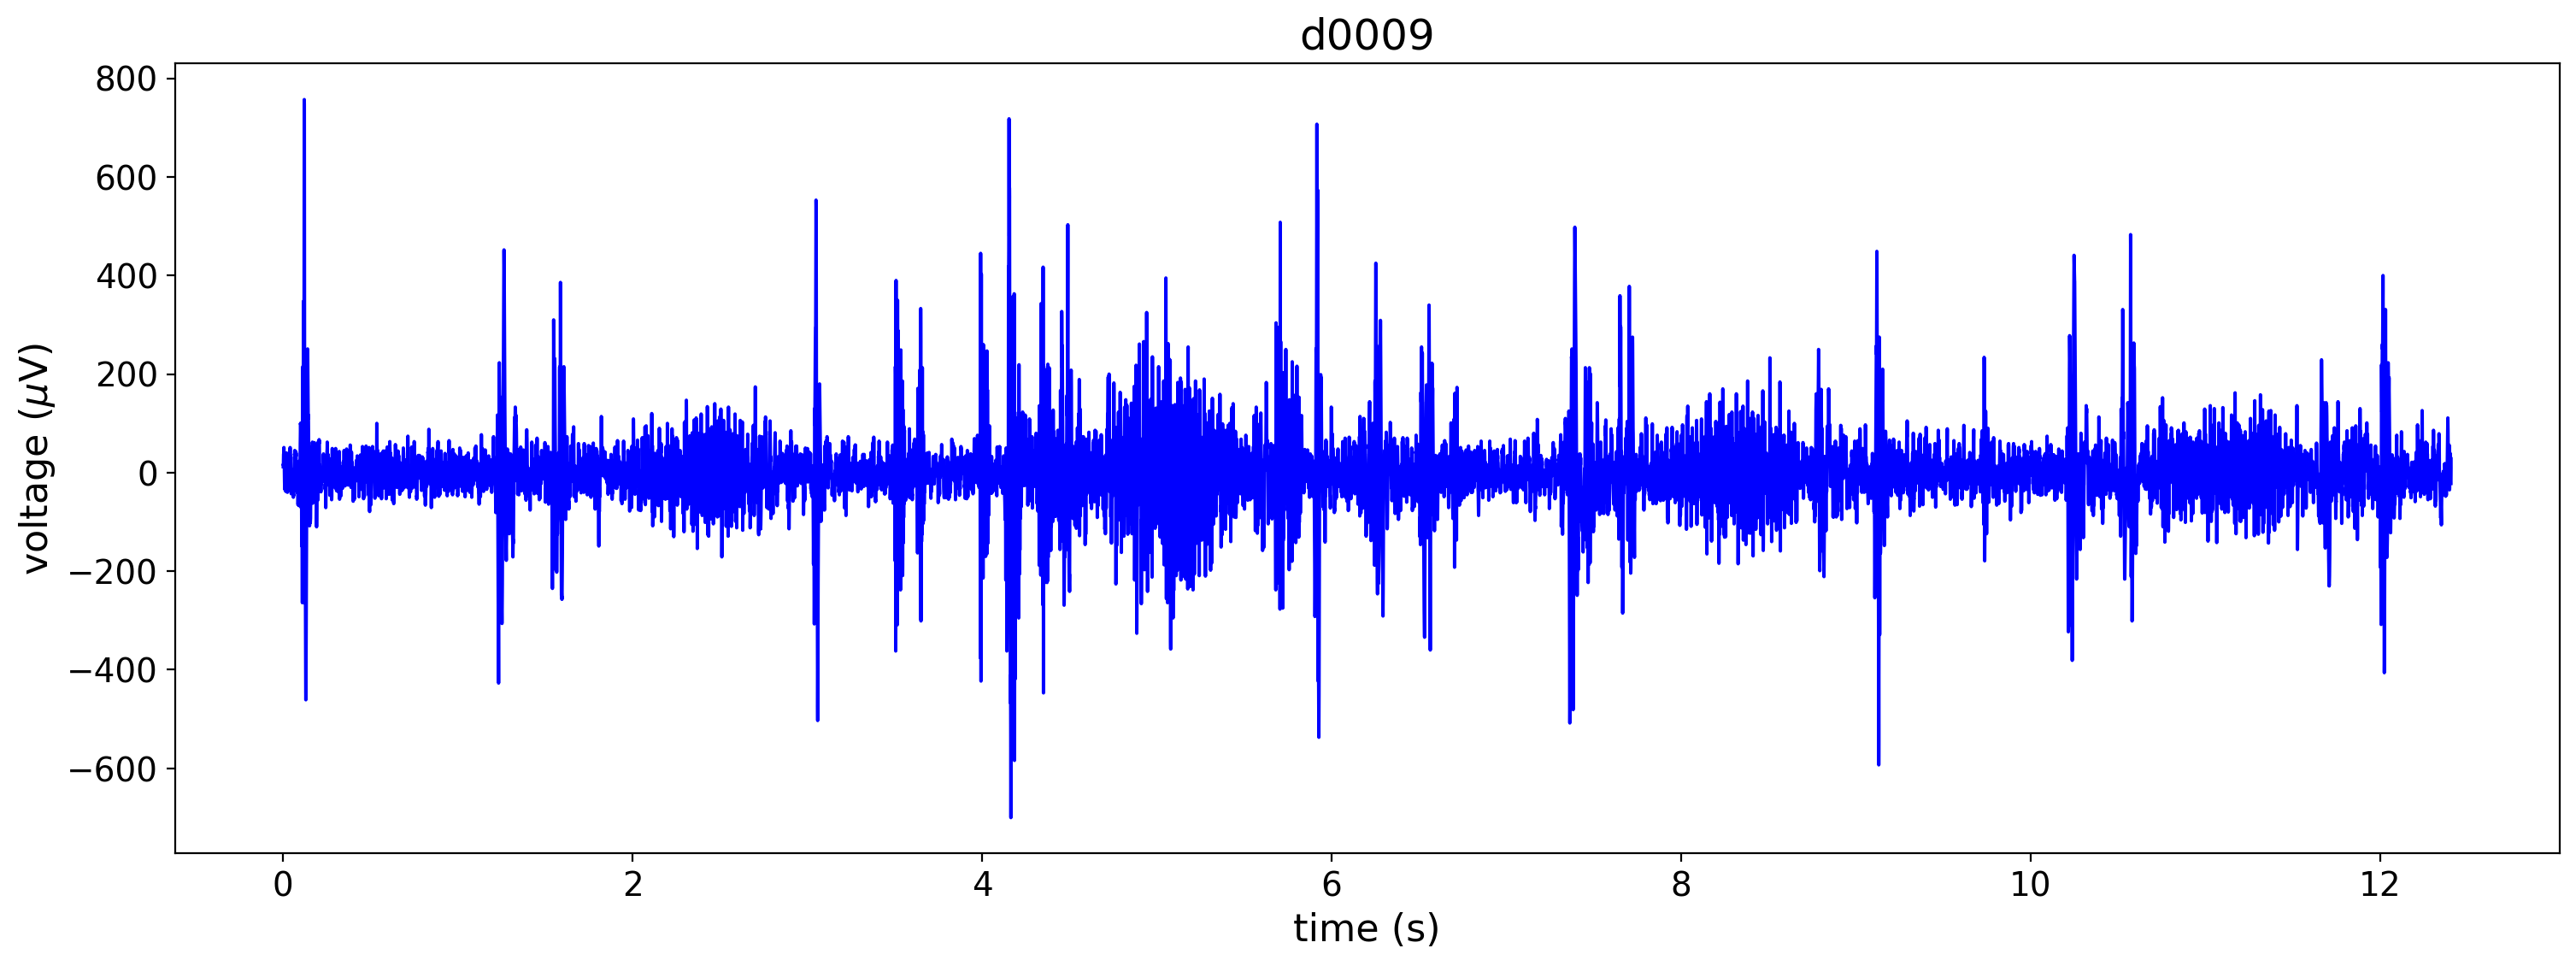

In [ ]:
for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i]+'.wav')
    # Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(nice[i])
    plt.show()

Se grafica a continuación un acercamiento a la gráfica de un audio específico de la lista. Para ajustar la ampliación para ver solo un latido o tres latidos como se muestra, modificar los límites del eje x en la línea 10 de la siguiente celda.

Esto permitió averiguar manualmente por medio de operaciones matemáticas la frecuencia cardíaca de la onda d0002, la onda elegida.

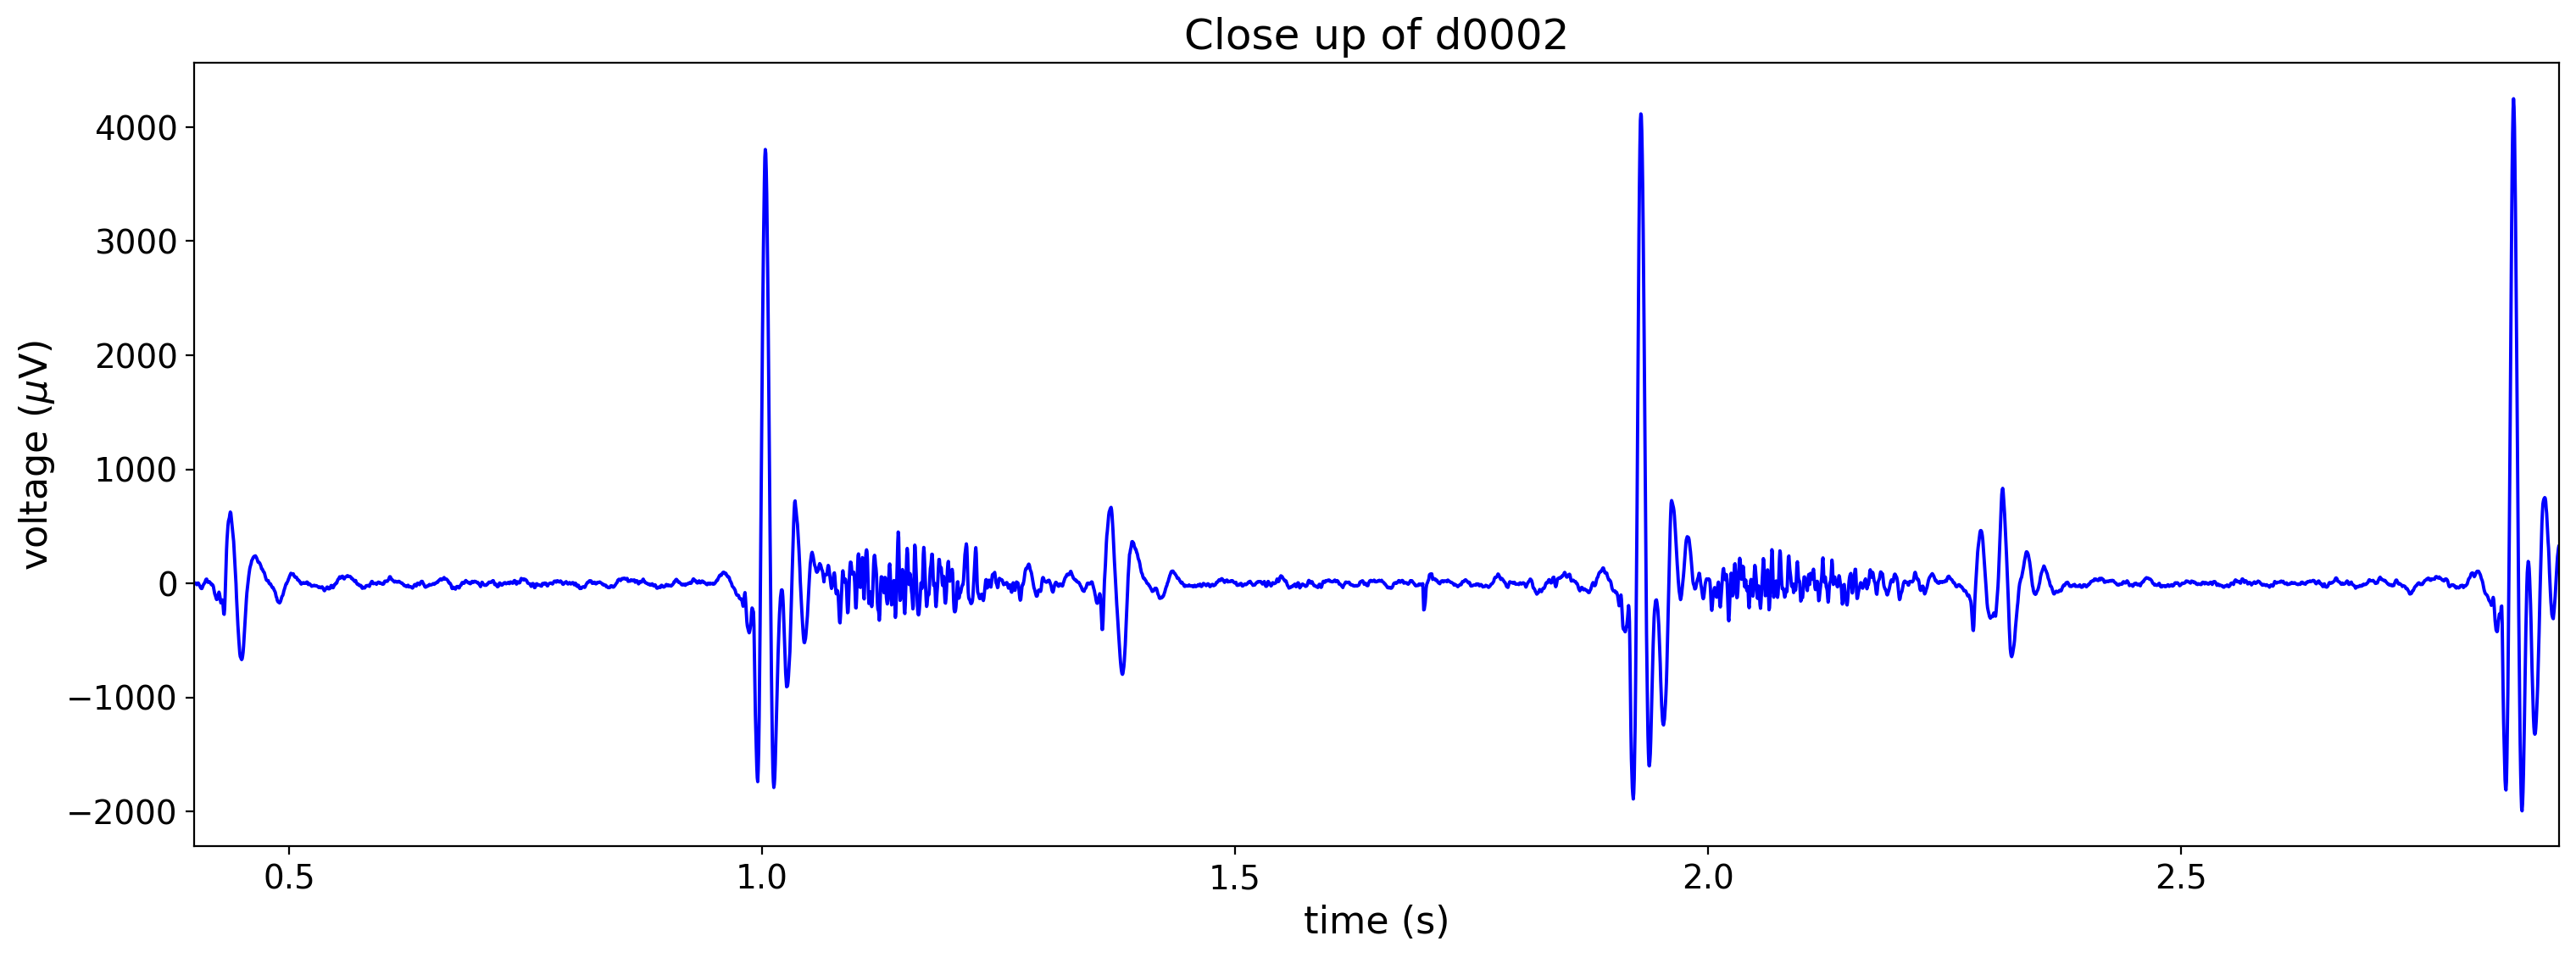

In [ ]:
#Obtaining data
nombreArchivo = "d0002"
timeECG, waveData = ecg(nombreArchivo +'.wav')

# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.40,2.9)
plt.title("Close up of " + nombreArchivo)
plt.show()

# Parte 2
### 8 de octubre de 2023


Haciendo uso del preámbulo de la Parte 1 y de la función ecg() el código continúa.

Se crea una función que detectará los máximos locales de las gráficas de los archivos, esto con el fin de que el programa calcule la distancia entre cada uno de ellos y determine el periodo entre cada latido.

Esta función acepta un valor llamado threshold_ratio, el cual modifica el umbral en el cual se calculan los máximos. Aumentar este valor reduce la cantidad de máximos. Se debe aumentar este umbral si la función detecta picos en donde no los hay, y se debe disminuir si no se detectan todos los picos.

In [ ]:
def detecta_maximos_locales(timeECG, waveData, threshold_ratio):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

A continuación se establecen listas que contienen datos para cada una de las 15 señales a analizar y se guardan en una matriz llamada audios. Cabe decir que se tuvo que utilizar algunas señales distintas de las graficadas en la Parte 1 debido a que no era posible determinar los máximos locales de todas.

En cada lista; la primera entrada es el nombre del archivo; la segunda contiene el valor de n2, este representa el límite mayor de tiempo en que se toma la medición de los datos de cada señal; y la tercera entrada corresponde al valor del umbral de cada gráfica para que se muestren los máximos adecuadamente.

Estos valores son específicos de cada audio y fueron obtenidos manualmente, alterando dichos valores para que no ocurriera ningún error.

In [ ]:
a0015 = ["a0015", 7.1, 0.63]
a0017 = ["a0017", 7.1, 0.75]
a0026 = ["a0026", 7.1, 0.52]
a0032 = ["a0032", 7.1, 0.85]
a0051 = ["a0051", 7.1, 0.72]
a0088 = ["a0088", 7.1, 0.7]
a0091 = ["a0091", 6.1, 0.65]
a0094 = ["a0094", 7.1, 0.8]
a0106 = ["a0106", 7.1, 0.7]
a0127 = ["a0127", 7.1, 0.82]
c0001 = ["c0001", 4.5, 0.65]
c0004 = ["c0004", 7.9, 0.7]
c0031 = ["c0031", 7.9, 0.79]
d0002 = ["d0002", 2.1, 0.7]
d0009 = ["d0009", 2.4, 0.8]

audios = [a0015, a0017, a0026, a0032, a0051, a0088, a0091, a0094, a0106, a0127, c0001, c0004, c0031, d0002, d0009]

A continuación se invoca la función que recopila los datos de cada archivo y la función que detecta los máximos, haciendo uso del valor n2 y el umbral (threshold_ratio).

El ciclo se usa para que se repitan estas acciones para cada lista en la matriz que contiene los archivos.

Finalmente en la línea 23 se calcula la frecuencia cardíaca y se imprimen los resultados.

In [ ]:
for audio in audios:
    nombre_archivo = audio[0]
    n2 = audio[1]
    threshold_ratio = audio[2]
    print("Nombre: " + nombre_archivo)
    print("n2: %.1f"%(n2))
    print("threshold_ratio: %.2f"%(threshold_ratio))

    #Obtaining data
    timeECG, waveData = ecg(nombre_archivo + ".wav")

    #Seconds at which we are going to cut the recording
    n1 = .40
    # n2 es parte del ciclo for

    m1 = int(n1*10000)
    m2 = int(n2*10000)

    timeECG, waveData = timeECG[m1:m2], waveData[m1:m2]

    mxs_indices = detecta_maximos_locales(timeECG, waveData, threshold_ratio)

    mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
    print("Beats per minute:", mean_bpm, "\n")

Nombre: a0015
n2: 7.1
threshold_ratio: 0.63
Beats per minute: 57.31348636048627 

Nombre: a0017
n2: 7.1
threshold_ratio: 0.75
Beats per minute: 82.38813438075178 

Nombre: a0026
n2: 7.1
threshold_ratio: 0.52
Beats per minute: 82.38813212566188 

Nombre: a0032
n2: 7.1
threshold_ratio: 0.85
Beats per minute: 59.1045311861915 

Nombre: a0051
n2: 7.1
threshold_ratio: 0.72
Beats per minute: 82.38813212566188 

Nombre: a0088
n2: 7.1
threshold_ratio: 0.70
Beats per minute: 77.0150056297475 

Nombre: a0091
n2: 6.1
threshold_ratio: 0.65
Beats per minute: 69.47376972802255 

Nombre: a0094
n2: 7.1
threshold_ratio: 0.80
Beats per minute: 80.59708798117022 

Nombre: a0106
n2: 7.1
threshold_ratio: 0.70
Beats per minute: 53.73139198744681 

Nombre: a0127
n2: 7.1
threshold_ratio: 0.82
Beats per minute: 68.05976132119893 

Nombre: c0001
n2: 4.5
threshold_ratio: 0.65
Beats per minute: 84.87825131354455 

Nombre: c0004
n2: 7.9
threshold_ratio: 0.70
Beats per minute: 73.60034103164702 

Nombre: c0031
n2: 